Steps to be followed:

This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an 
instance corresponding to one voice recording. There are around six 
recordings per patient, the name of the patient is identified in the first 
column.For further information or to pass on comments, please contact Max 
Little (littlem '@' robots.ox.ac.uk).

Attribute Information:

Matrix column entries (attributes):
name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

1. Load the data set

2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the data set. (2.5 points)

3. Using uni-variate & bi-variate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

4. Split the data set into training and test set in the ratio of 70:30 (Training:Test)

5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a cross-tab. (7.5 points)

7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 
8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [ ]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("parkinsons_data.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
print("shape = ", df.shape)
print("*"*70)
print(df.info())

shape =  (195, 24)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-n

In [5]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [7]:
#list of columns
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [8]:
#Since column names are big it will be easy to do plots and calculations if the column names are small
df.columns = ['name','Fo','Fhi','Flo','Jitter(%)','Jitter(Abs)','RAP','PPQ','DDP','Shimmer','Shimmer(dB)','APQ3','APQ5','APQ','DDA','NHR','HNR','status','RPDE','DFA','spread1','spread2','D2','PPE']
df.columns

Index(['name', 'Fo', 'Fhi', 'Flo', 'Jitter(%)', 'Jitter(Abs)', 'RAP', 'PPQ',
       'DDP', 'Shimmer', 'Shimmer(dB)', 'APQ3', 'APQ5', 'APQ', 'DDA', 'NHR',
       'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

# Uni-Variate analysis of Fo column:
# We will use histogram for analyzing this feature 

Text(0, 0.5, 'Frequency')

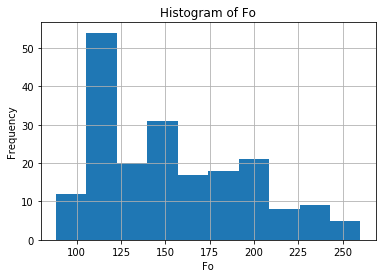

In [9]:
df["Fo"].hist()
plt.title('Histogram of Fo')
plt.xlabel('Fo')
plt.ylabel('Frequency')

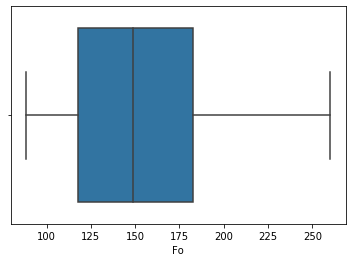

In [10]:
sns.boxplot(x='Fo',data=df)

In [11]:
print(df['Fo'].describe())
print("*"*80)
q75, q25 = np.percentile(df['Fo'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower fence = ", lower_fence)
#print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['Fo'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['Fo'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['Fo'].skew())
print("*"*80)
print("Kurtosis K = ", df['Fo'].kurt())
print("*"*80)

count    195.000000
mean     154.228641
std       41.390065
min       88.333000
25%      117.572000
50%      148.790000
75%      182.769000
max      260.105000
Name: Fo, dtype: float64
********************************************************************************
IQR =  65.197
There are NO OUTLIERS on the left side of the distribution
There are NO OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  0.5917374636540784
********************************************************************************
Kurtosis K =  -0.6278981066788805
********************************************************************************


### Basic uni-variate Statistical Observations for Fo feature: 

### Since there are NO outliers in this distribution, 
### Central value is measured by Mean = 154.228641
### Spread is measured by the std(SD) = 41.390065

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a negative kurtosis(less number of outliers) and positive skew(right-skewed distribution). The box plot above also tells the same thing.

# Bi-Variate analysis of Fo column:

In [12]:
df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['Fo']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['Fo']

In [13]:
print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)


********************************************************************************
Distribution for people with No Parkinson's Disease:
count     48.000000
mean     181.937771
std       52.731067
min      110.739000
25%      120.947500
50%      198.996000
75%      229.077000
max      260.105000
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  108.1295
lower fence =  -41.24674999999998
upper fence =  391.27125
There are NO OUTLIERS on the left side of this distribution
There are NO OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  -0.20608047554356107
********************************************************************************
Kurtosis K =  -1.6481907157014015
********************************************************************************


********************************************************************************
Distr

(array([ 75., 100., 125., 150., 175., 200., 225., 250., 275.]),
 <a list of 9 Text yticklabel objects>)

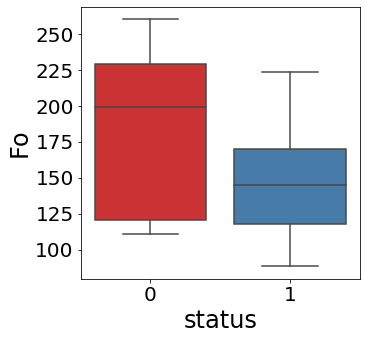

In [14]:

plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='Fo', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('Fo', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Basic bivariate Statistical Observations for Fo feature: 
## For people with no Parkinson's Disease(status=0):
### Since there are NO outliers in this distribution, 
### Central value is measured by Mean = 181.937771
### Spread is measured by the SD = 52.731067
### This feature has a negative kurtosis(less number of outliers) and negative skew(left-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are NO outliers in this distribution, 
### Central value is measured by Mean = 145.180762
### Spread is measured by the SD = 32.348050
### This feature has a negative kurtosis(less number of outliers) and positive skew(right-skewed distribution).


## Correlation between this independant variable and target variable:

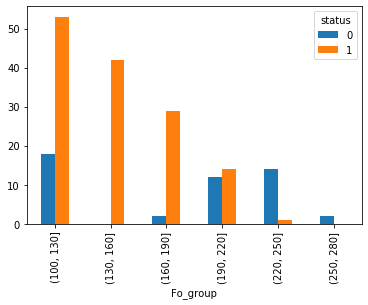

In [15]:
df_temp = df.copy(deep=True)
df_temp['Fo_group'] = pd.cut(x=df_temp['Fo'],bins=[100,130,160,190,220,250,280])
pd.crosstab(df_temp['Fo_group'],df_temp['status']).plot(kind='bar')

## Observation on the correlation:
### By looking at the above plot, we can say that this is a good feature in the prediction of PD. When the average frequency is lower, the chances of this disease being positive is high and the chances reduce when the average frequency goes up. 
## So, we will keep this feature in our further analysis.

# Uni-Variate analysis of Fhi column:
# We will use histogram for analyzing this feature

Text(0, 0.5, 'Frequency')

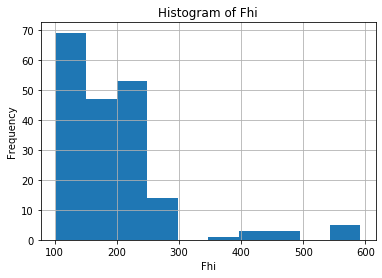

In [16]:
df["Fhi"].hist()
plt.title('Histogram of Fhi')
plt.xlabel('Fhi')
plt.ylabel('Frequency')

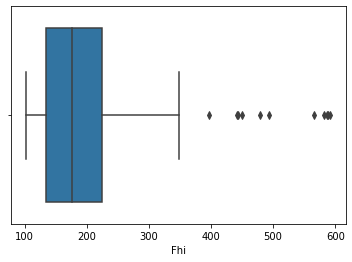

In [17]:
sns.boxplot(x='Fhi',data=df)

In [18]:
print(df['Fhi'].describe())
print("*"*80)
q75, q25 = np.percentile(df['Fhi'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower outlier limit = ", lower_fence)
#print("upper outlier limit = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['Fhi'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['Fhi'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['Fhi'].skew())
print("*"*80)
print("Kurtosis K = ", df['Fhi'].kurt())
print("*"*80)

count    195.000000
mean     197.104918
std       91.491548
min      102.145000
25%      134.862500
50%      175.829000
75%      224.205500
max      592.030000
Name: Fhi, dtype: float64
********************************************************************************
IQR =  89.34299999999999
There are NO OUTLIERS on the left side of the distribution
There are OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  2.542145997588398
********************************************************************************
Kurtosis K =  7.627241211631889
********************************************************************************


### Basic uni-variate Statistical Observations for Fhi feature: 

### Since there are outliers in this distribution, 
### Central value is measured by Median = 175.829000
### Spread is measured by the IQR = 89.343

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). The box plot above also tells the same thing. 

# Bi-Variate analysis of Fhi column:

In [19]:
df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['Fhi']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['Fhi']

In [20]:
print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_outlier_limit = (q25 - 1.5 * iqr)
upper_outlier_limit = (q75 + 1.5 * iqr)
print("lower fence = ", lower_outlier_limit)
print("upper fence = ", upper_outlier_limit)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_outlier_limit):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_outlier_limit):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_outlier_limit = (q25 - 1.5 * iqr)
upper_outlier_limit = (q75 + 1.5 * iqr)
print("lower fence = ", lower_outlier_limit)
print("upper fence = ", upper_outlier_limit)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_outlier_limit):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_outlier_limit):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)


********************************************************************************
Distribution for people with No Parkinson's Disease:
count     48.000000
mean     223.636750
std       96.727067
min      113.597000
25%      139.413250
50%      231.161500
75%      251.239250
max      592.030000
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  111.826
lower fence =  -28.32574999999997
upper fence =  418.97825
There are NO OUTLIERS on the left side of this distribution
There are OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  2.191356776361523
********************************************************************************
Kurtosis K =  6.983751803630551
********************************************************************************


********************************************************************************
Distribution f

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 <a list of 8 Text yticklabel objects>)

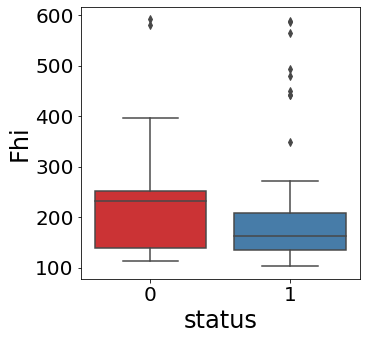

In [21]:
plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='Fhi', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('Fhi', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Basic bivariate Statistical Observations for Fhi feature: 
## For people with no Parkinson's Disease(status=0):
### Since there are outliers in this distribution, 
### Central value is measured by Median =231.161500
### Spread is measured by the IQR = 111.826
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are outliers in this distribution, 
### Central value is measured by Median =163.335000
### Spread is measured by the IQR = 73.38400000000001
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution).


## Correlation between this independant variable and target variable:

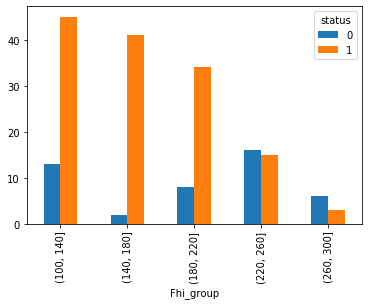

In [22]:
df_temp = df.copy(deep=True)
df_temp['Fhi_group'] = pd.cut(x=df_temp['Fhi'],bins=[100,140,180,220,260,300])
pd.crosstab(df_temp['Fhi_group'],df_temp['status']).plot(kind='bar')

## Observations on the correlation:
### By looking at the above plot, we can say that this is a good feature in the prediction of PD. When the maximum frequency is
### lower, the chances of this disease being positive is high and the chances reduce when the maximum frequency goes up. 
## So, we will keep this feature in our further analysis.

# Uni-Variate analysis of Flo column:
# We will use histogram for analyzing this feature

Text(0, 0.5, 'Frequency')

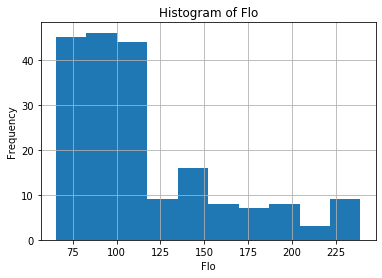

In [23]:
df["Flo"].hist()
plt.title('Histogram of Flo')
plt.xlabel('Flo')
plt.ylabel('Frequency')

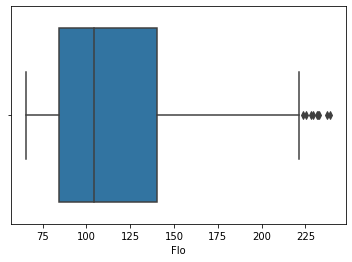

In [24]:
sns.boxplot(x='Flo',data=df)

In [25]:
print(df['Flo'].describe())
print("*"*80)
q75, q25 = np.percentile(df['Flo'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower fence = ", lower_fence)
#print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['Flo'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['Flo'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['Flo'].skew())
print("*"*80)
print("Kurtosis K = ", df['Flo'].kurt())
print("*"*80)


count    195.000000
mean     116.324631
std       43.521413
min       65.476000
25%       84.291000
50%      104.315000
75%      140.018500
max      239.170000
Name: Flo, dtype: float64
********************************************************************************
IQR =  55.72750000000002
There are NO OUTLIERS on the left side of the distribution
There are OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  1.217350448627808
********************************************************************************
Kurtosis K =  0.6546145211395396
********************************************************************************


### Basic uni-variate Statistical Observations for Flo feature: 

### Since there are NO outliers in this distribution, 
### Central value is measured by Median = 104.315
### Spread is measured by the IQR = 55.72750000000002

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). The box plot above also tells the same thing. 

# Bi-Variate analysis of Flo column:

In [26]:
df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['Flo']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['Flo']

In [27]:
print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)

********************************************************************************
Distribution for people with No Parkinson's Disease:
count     48.000000
mean     145.207292
std       58.757070
min       74.287000
25%       98.243750
50%      113.938500
75%      199.183000
max      239.170000
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  100.93925000000002
lower fence =  -53.16512500000002
upper fence =  350.5918750000001
There are NO OUTLIERS on the left side of this distribution
There are NO OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  0.45440071659018505
********************************************************************************
Kurtosis K =  -1.5684019767347277
********************************************************************************


*********************************************************************

(array([ 50.,  75., 100., 125., 150., 175., 200., 225., 250.]),
 <a list of 9 Text yticklabel objects>)

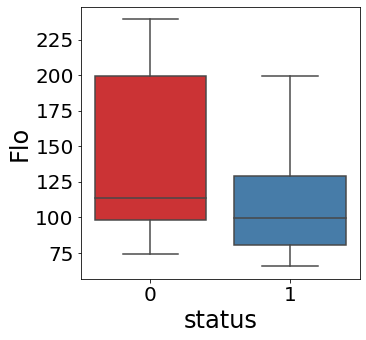

In [28]:
plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='Flo', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('Flo', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Basic bivariate Statistical Observations for Flo feature: 
## For people with no Parkinson's Disease(status=0):
### Since there are NO outliers in this distribution, 
### Central value is measured by Mean = 181.937771
### Spread is measured by the SD = 52.731067
### This feature has a negative kurtosis(less number of outliers) and positive skew(right-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are NO outliers in this distribution, 
### Central value is measured by Mean = 145.180762
### Spread is measured by the SD = 32.348050
### This feature has a negative kurtosis(less number of outliers) and positive skew(right-skewed distribution).


## Correlation between this independant variable and target variable:

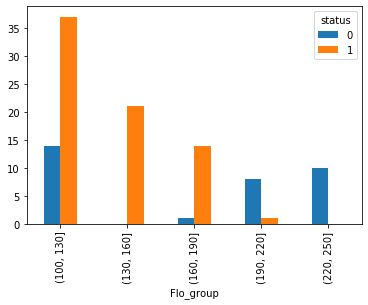

In [29]:
df_temp = df.copy(deep=True)
df_temp['Flo_group'] = pd.cut(x=df_temp['Flo'],bins=[100,130,160,190,220,250,280])
pd.crosstab(df_temp['Flo_group'],df_temp['status']).plot(kind='bar')

## Observations on the correlation:
## By looking at the above plot, we can say that this is a good feature in the prediction of PD. When the minimum frequency is lower, the chances of this disease being positive is high and the chances reduce when the minimum frequency goes up. 
## So, we will keep this feature in our further analysis.

# Uni-Variate analysis of Jitter(%) column:
# We will use histogram for analyzing this feature

Text(0, 0.5, 'Frequency')

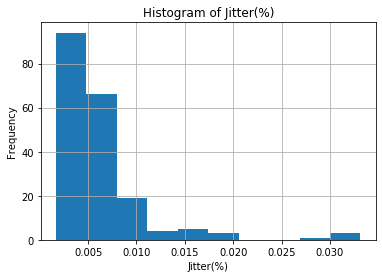

In [30]:
df["Jitter(%)"].hist()
plt.title('Histogram of Jitter(%)')
plt.xlabel('Jitter(%)')
plt.ylabel('Frequency')

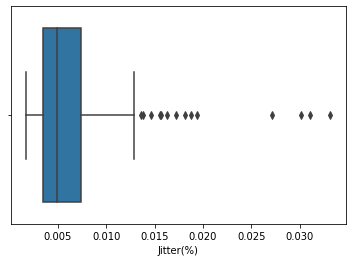

In [31]:
sns.boxplot(x='Jitter(%)',data=df)

In [32]:
print(df['Jitter(%)'].describe())
print("*"*80)
q75, q25 = np.percentile(df['Jitter(%)'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower fence = ", lower_fence)
#print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['Jitter(%)'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['Jitter(%)'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['Jitter(%)'].skew())
print("*"*80)
print("Kurtosis K = ", df['Jitter(%)'].kurt())
print("*"*80)


count    195.000000
mean       0.006220
std        0.004848
min        0.001680
25%        0.003460
50%        0.004940
75%        0.007365
max        0.033160
Name: Jitter(%), dtype: float64
********************************************************************************
IQR =  0.003905
There are NO OUTLIERS on the left side of the distribution
There are OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  3.0849462014441817
********************************************************************************
Kurtosis K =  12.030939276179508
********************************************************************************


### Basic uni-variate Statistical Observations for Jitter(%) feature: 

### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.004940
### Spread is measured by the IQR = 0.003905

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). The box plot above also tells the same thing. 


# Bi-Variate analysis of Jitter(%) column:

In [33]:
df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['Jitter(%)']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['Jitter(%)']

In [34]:
print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)

********************************************************************************
Distribution for people with No Parkinson's Disease:
count    48.000000
mean      0.003866
std       0.002055
min       0.001780
25%       0.002655
50%       0.003355
75%       0.004530
max       0.013600
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  0.001875
lower fence =  -0.00015749999999999965
upper fence =  0.0073425
There are NO OUTLIERS on the left side of this distribution
There are OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  2.5951960664159706
********************************************************************************
Kurtosis K =  9.942782358628424
********************************************************************************


********************************************************************************
Distribution fo

(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035]),
 <a list of 8 Text yticklabel objects>)

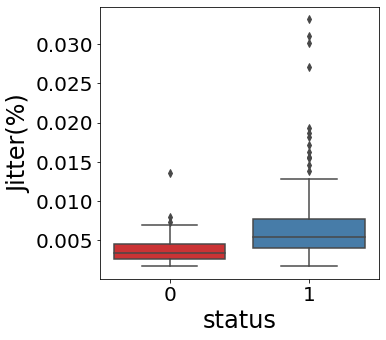

In [35]:
plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='Jitter(%)', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('Jitter(%)', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Basic bivariate Statistical Observations for Jitter(%) feature: 
## For people with no Parkinson's Disease(status=0):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.003866
### Spread is measured by the IQR = 0.001875
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.005440
### Spread is measured by the IQR = 0.003665
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution).


## Correlation between this independant variable and target variable:

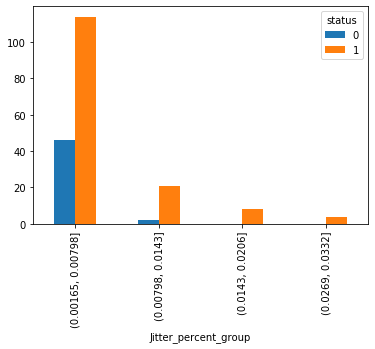

In [36]:
df_temp = df.copy(deep=True)
df_temp['Jitter_percent_group'] = pd.cut(x=df_temp['Jitter(%)'],bins=5)
pd.crosstab(df_temp['Jitter_percent_group'],df_temp['status']).plot(kind='bar')

## Observations on the correlation:
## By looking at the above plot, we can say that this is a good feature in the prediction of PD. When the  Jitter % is lower, the chances of this disease being positive are high and the chances reduce when the Jitter % goes up. 
## So, we will keep this feature in our further analysis.

# Uni-Variate analysis of Jitter(Abs) column:
# We will use histogram for analyzing this feature

Text(0, 0.5, 'Frequency')

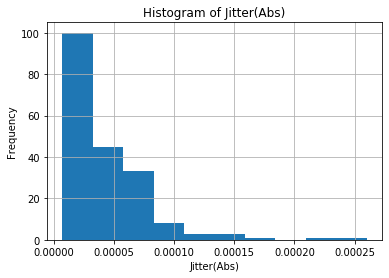

In [37]:
df["Jitter(Abs)"].hist()
plt.title('Histogram of Jitter(Abs)')
plt.xlabel('Jitter(Abs)')
plt.ylabel('Frequency')

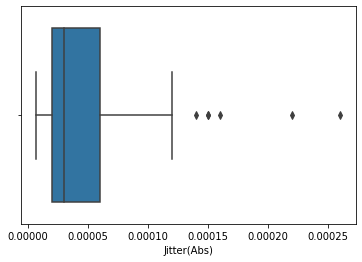

In [38]:
sns.boxplot(x='Jitter(Abs)',data=df)

In [39]:
print(df['Jitter(Abs)'].describe())
print("*"*80)
q75, q25 = np.percentile(df['Jitter(Abs)'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower fence = ", lower_fence)
#print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['Jitter(Abs)'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['Jitter(Abs)'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['Jitter(Abs)'].skew())
print("*"*80)
print("Kurtosis K = ", df['Jitter(Abs)'].kurt())
print("*"*80)


count    195.000000
mean       0.000044
std        0.000035
min        0.000007
25%        0.000020
50%        0.000030
75%        0.000060
max        0.000260
Name: Jitter(Abs), dtype: float64
********************************************************************************
IQR =  3.9999999999999996e-05
There are NO OUTLIERS on the left side of the distribution
There are OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  2.6490714165257274
********************************************************************************
Kurtosis K =  10.869042517763667
********************************************************************************


### Basic uni-variate Statistical Observations for Jitter(Abs) feature: 

### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.000030
### Spread is measured by the IQR = 3.999999e-05

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). The box plot above also tells the same thing. 


# Bi-Variate analysis of Jitter(Abs) column:

In [40]:
df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['Jitter(Abs)']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['Jitter(Abs)']

In [41]:
print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)


********************************************************************************
Distribution for people with No Parkinson's Disease:
count    48.000000
mean      0.000023
std       0.000015
min       0.000007
25%       0.000010
50%       0.000025
75%       0.000030
max       0.000080
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  1.9999999999999998e-05
lower fence =  -1.9999999999999998e-05
upper fence =  5.9999999999999995e-05
There are NO OUTLIERS on the left side of this distribution
There are OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  1.203508231519063
********************************************************************************
Kurtosis K =  2.6354731415288377
********************************************************************************


*********************************************************************

(array([-5.0e-05,  0.0e+00,  5.0e-05,  1.0e-04,  1.5e-04,  2.0e-04,
         2.5e-04,  3.0e-04]), <a list of 8 Text yticklabel objects>)

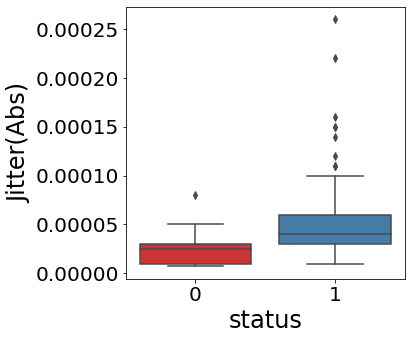

In [42]:

plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='Jitter(Abs)', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('Jitter(Abs)', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Basic bivariate Statistical Observations for Jitter(Abs) feature: 
## For people with no Parkinson's Disease(status=0):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.000025
### Spread is measured by the IQR = 1.9999999999999998e-05
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.000040
### Spread is measured by the IQR = 2.9999999999999997e-05
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution).


## Correlation between this independant variable and target variable:

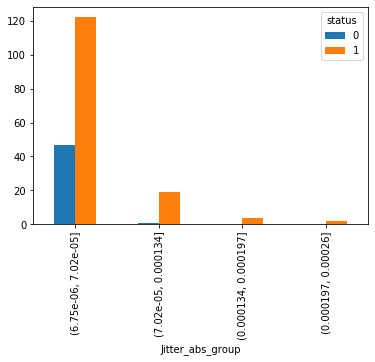

In [43]:
df_temp = df.copy(deep=True)
df_temp['Jitter_abs_group'] = pd.cut(x=df_temp['Jitter(Abs)'],bins=4)
pd.crosstab(df_temp['Jitter_abs_group'],df_temp['status']).plot(kind='bar')

## Observations on the correlation:
## By looking at the above plot, we can say that this is a good feature in the prediction of PD. When the  Jitter Abs is lower, the chances of this disease being positive are high and the chances reduce when the Jitter Abs goes up. 
## So, we will keep this feature in our further analysis.

# Uni-Variate analysis of RAP column:
# We will use histogram for analyzing this feature

Text(0, 0.5, 'Frequency')

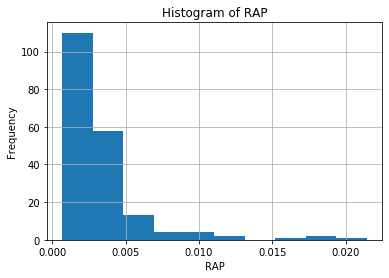

In [44]:
df["RAP"].hist()
plt.title('Histogram of RAP')
plt.xlabel('RAP')
plt.ylabel('Frequency')

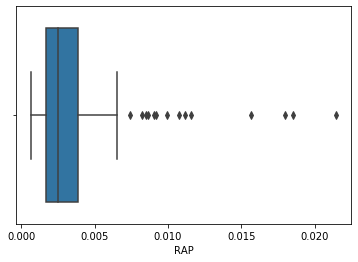

In [45]:
sns.boxplot(x='RAP',data=df)

In [46]:
print(df['RAP'].describe())
print("*"*80)
q75, q25 = np.percentile(df['RAP'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower fence = ", lower_fence)
#print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['RAP'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['RAP'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['RAP'].skew())
print("*"*80)
print("Kurtosis K = ", df['RAP'].kurt())
print("*"*80)


count    195.000000
mean       0.003306
std        0.002968
min        0.000680
25%        0.001660
50%        0.002500
75%        0.003835
max        0.021440
Name: RAP, dtype: float64
********************************************************************************
IQR =  0.002175
There are NO OUTLIERS on the left side of the distribution
There are OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  3.360708450480554
********************************************************************************
Kurtosis K =  14.213797721522418
********************************************************************************


### Basic uni-variate Statistical Observations for RAP feature: 

### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.002500
### Spread is measured by the IQR = 0.002175

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). The box plot above also tells the same thing. 


# Bi-Variate analysis of RAP column:

In [47]:
df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['RAP']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['RAP']

In [48]:
print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)


********************************************************************************
Distribution for people with No Parkinson's Disease:
count    48.000000
mean      0.001925
std       0.001066
min       0.000920
25%       0.001332
50%       0.001625
75%       0.001907
max       0.006240
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  0.000575
lower fence =  0.00046999999999999993
upper fence =  0.00277
There are NO OUTLIERS on the left side of this distribution
There are OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  2.2274382778123583
********************************************************************************
Kurtosis K =  5.650891456233562
********************************************************************************


********************************************************************************
Distribution for p

(array([-0.005,  0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025]),
 <a list of 7 Text yticklabel objects>)

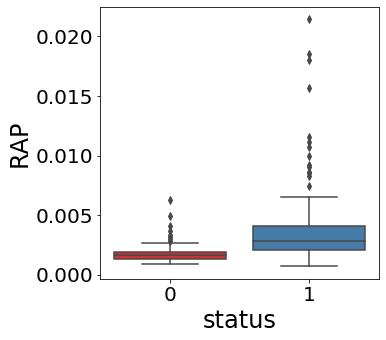

In [49]:

plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='RAP', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('RAP', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Basic bivariate Statistical Observations for RAP feature: 
## For people with no Parkinson's Disease(status=0):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.001625
### Spread is measured by the IQR = 0.000575
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.002840
### Spread is measured by the IQR = 0.00207
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution).


## Correlation between this independant variable and target variable:

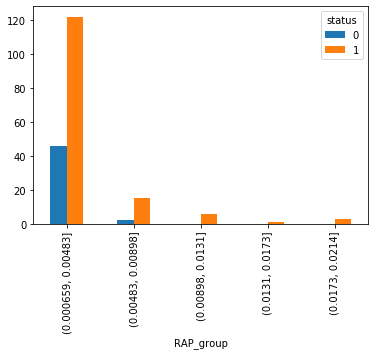

In [50]:
df_temp = df.copy(deep=True)
df_temp['RAP_group'] = pd.cut(x=df_temp['RAP'],bins=5)
pd.crosstab(df_temp['RAP_group'],df_temp['status']).plot(kind='bar')

## Observations on the correlation:
## By looking at the above plot, we can say that this is a good feature in the prediction of PD. When the  RAP is lower, the chances of this disease being positive are high and the chances reduce when the RAP goes up. 
## So, we will keep this feature in our further analysis.

# Uni-Variate analysis of PPQ column:
# We will use histogram for analyzing this feature

Text(0, 0.5, 'Frequency')

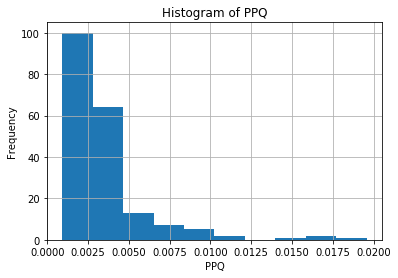

In [51]:
df["PPQ"].hist()
plt.title('Histogram of PPQ')
plt.xlabel('PPQ')
plt.ylabel('Frequency')

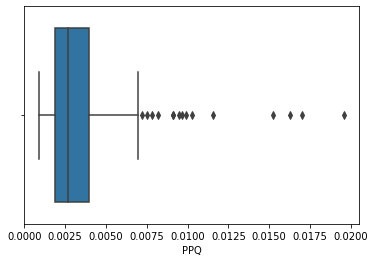

In [52]:
sns.boxplot(x='PPQ',data=df)

In [53]:
print(df['PPQ'].describe())
print("*"*80)
q75, q25 = np.percentile(df['PPQ'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower fence = ", lower_fence)
#print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['PPQ'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['PPQ'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['PPQ'].skew())
print("*"*80)
print("Kurtosis K = ", df['PPQ'].kurt())
print("*"*80)


count    195.000000
mean       0.003446
std        0.002759
min        0.000920
25%        0.001860
50%        0.002690
75%        0.003955
max        0.019580
Name: PPQ, dtype: float64
********************************************************************************
IQR =  0.002095
There are NO OUTLIERS on the left side of the distribution
There are OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  3.073892457888517
********************************************************************************
Kurtosis K =  11.963922120220282
********************************************************************************


### Basic Statistical Observations: 

### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.002690
### Spread is measured by the IQR = 0.002095

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). The box plot above also tells the same thing. 

# Bi-Variate analysis of PPQ column:

In [54]:
df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['PPQ']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['PPQ']

In [55]:
print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)

********************************************************************************
Distribution for people with No Parkinson's Disease:
count    48.000000
mean      0.002056
std       0.000943
min       0.001060
25%       0.001480
50%       0.001775
75%       0.002228
max       0.005640
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  0.0007475000000000003
lower fence =  0.0003587499999999995
upper fence =  0.003348750000000001
There are NO OUTLIERS on the left side of this distribution
There are OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  1.8984080046253102
********************************************************************************
Kurtosis K =  4.0346674360683865
********************************************************************************


*************************************************************************

(array([-0.0025,  0.    ,  0.0025,  0.005 ,  0.0075,  0.01  ,  0.0125,
         0.015 ,  0.0175,  0.02  ,  0.0225]),
 <a list of 11 Text yticklabel objects>)

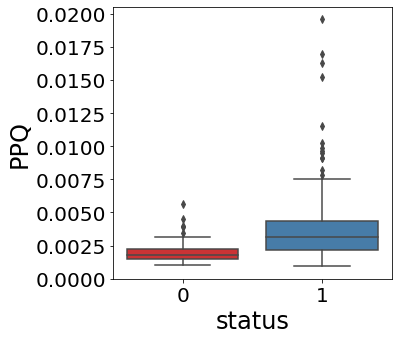

In [56]:
plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='PPQ', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('PPQ', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Basic Statistical Observations:
## For people with no Parkinson's Disease(status=0):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.001625
### Spread is measured by the IQR = 0.000575
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.002840
### Spread is measured by the IQR = 0.00207
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution).

## Correlation between this independant variable and target variable:

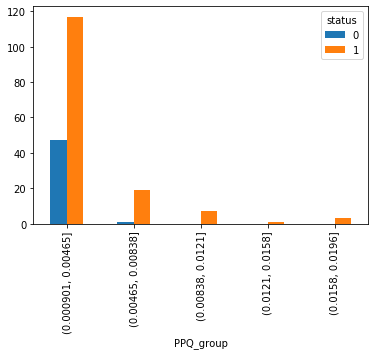

In [57]:
df_temp = df.copy(deep=True)
df_temp['PPQ_group'] = pd.cut(x=df_temp['PPQ'],bins=5)
pd.crosstab(df_temp['PPQ_group'],df_temp['status']).plot(kind='bar')

## Observations on the correlation:
## By looking at the above plot, we can say that this is a good feature in the prediction of PD. When the  PPQ is lower, the chances of this disease being positive are high and the chances reduce when the PPQ goes up. 
## So, we will keep this feature in our further analysis.

# Uni-Variate analysis of DDP column:
# We will use histogram for analyzing this feature

Text(0, 0.5, 'Frequency')

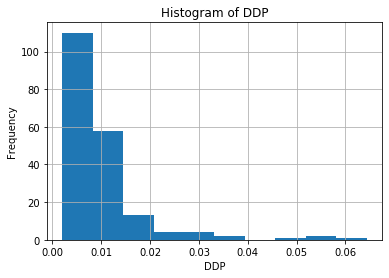

In [58]:
df["DDP"].hist()
plt.title('Histogram of DDP')
plt.xlabel('DDP')
plt.ylabel('Frequency')

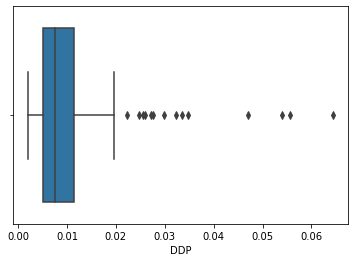

In [59]:
sns.boxplot(x='DDP',data=df)

In [60]:
print(df['DDP'].describe())
print("*"*80)
q75, q25 = np.percentile(df['DDP'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower fence = ", lower_fence)
#print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['DDP'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['DDP'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['DDP'].skew())
print("*"*80)
print("Kurtosis K = ", df['DDP'].kurt())
print("*"*80)

count    195.000000
mean       0.009920
std        0.008903
min        0.002040
25%        0.004985
50%        0.007490
75%        0.011505
max        0.064330
Name: DDP, dtype: float64
********************************************************************************
IQR =  0.00652
There are NO OUTLIERS on the left side of the distribution
There are OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  3.3620584478857203
********************************************************************************
Kurtosis K =  14.224761911379424
********************************************************************************



### Basic uni-variate Statistical Observations for DDP feature: 

### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.007490
### Spread is measured by the IQR = 0.00652

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). The box plot above also tells the same thing. 

# Bi-Variate analysis of DDP column:

In [61]:
df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['DDP']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['DDP']

In [62]:
print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)

********************************************************************************
Distribution for people with No Parkinson's Disease:
count    48.000000
mean      0.005776
std       0.003199
min       0.002760
25%       0.003998
50%       0.004875
75%       0.005725
max       0.018730
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  0.001727499999999999
lower fence =  0.0014062500000000017
upper fence =  0.008316249999999997
There are NO OUTLIERS on the left side of this distribution
There are OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  2.2272303351908067
********************************************************************************
Kurtosis K =  5.656073605127481
********************************************************************************


***************************************************************************

(array([-0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07]),
 <a list of 9 Text yticklabel objects>)

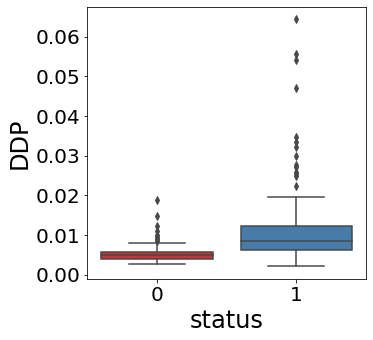

In [63]:

plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='DDP', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('DDP', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Basic bivariate Statistical Observations for DDP feature: 
## For people with no Parkinson's Disease(status=0):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.004875
### Spread is measured by the IQR = 0.001727499999999999
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.008530
### Spread is measured by the IQR = 0.006215
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution).

## Correlation between this independant variable and target variable:

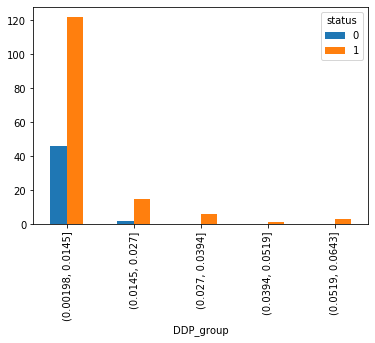

In [64]:
df_temp = df.copy(deep=True)
df_temp['DDP_group'] = pd.cut(x=df_temp['DDP'],bins=5)
pd.crosstab(df_temp['DDP_group'],df_temp['status']).plot(kind='bar')

## Observations on the correlation:
## By looking at the above plot, we can say that this is a good feature in the prediction of PD. When the  DDP is lower, the chances of this disease being positive are high and the chances reduce when the DDP goes up. 
## So, we will keep this feature in our further analysis.

# Uni-Variate analysis of Shimmer column:
# We will use histogram for analyzing this feature

Text(0, 0.5, 'Frequency')

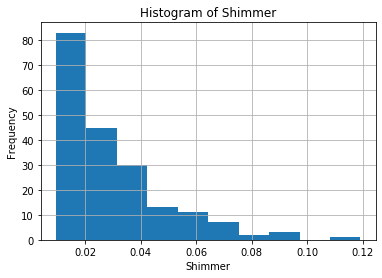

In [65]:
df["Shimmer"].hist()
plt.title('Histogram of Shimmer')
plt.xlabel('Shimmer')
plt.ylabel('Frequency')

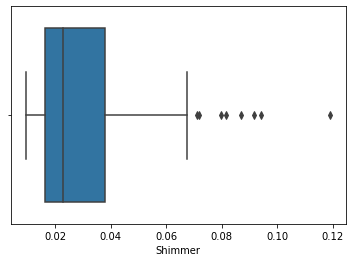

In [66]:
sns.boxplot(x='Shimmer',data=df)

In [67]:
print(df['Shimmer'].describe())
print("*"*80)
q75, q25 = np.percentile(df['Shimmer'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower fence = ", lower_fence)
#print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['Shimmer'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['Shimmer'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['Shimmer'].skew())
print("*"*80)
print("Kurtosis K = ", df['Shimmer'].kurt())
print("*"*80)

count    195.000000
mean       0.029709
std        0.018857
min        0.009540
25%        0.016505
50%        0.022970
75%        0.037885
max        0.119080
Name: Shimmer, dtype: float64
********************************************************************************
IQR =  0.021380000000000003
There are NO OUTLIERS on the left side of the distribution
There are OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  1.6664804101559663
********************************************************************************
Kurtosis K =  3.2383081111007535
********************************************************************************



### Basic uni-variate Statistical Observations for Shimmer feature: 

### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.022970
### Spread is measured by the IQR = 0.021380000000000003

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). The box plot above also tells the same thing. 

# Bi-Variate analysis of Shimmer column:

In [68]:

df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['Shimmer']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['Shimmer']

In [69]:
print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)

********************************************************************************
Distribution for people with No Parkinson's Disease:
count    48.000000
mean      0.017615
std       0.005544
min       0.009540
25%       0.014475
50%       0.016705
75%       0.020210
max       0.040870
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  0.005734999999999999
lower fence =  0.005872500000000001
upper fence =  0.028812499999999998
There are NO OUTLIERS on the left side of this distribution
There are OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  1.6327750567727746
********************************************************************************
Kurtosis K =  5.353303951189466
********************************************************************************


****************************************************************************

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14]),
 <a list of 8 Text yticklabel objects>)

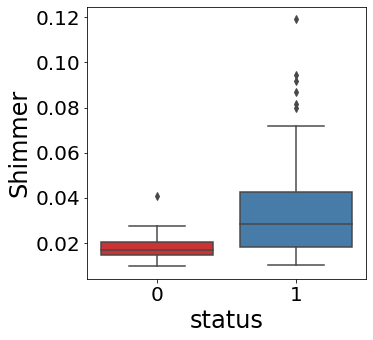

In [70]:
plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='Shimmer', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('Shimmer', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Basic bivariate Statistical Observations for Shimmer feature: 
## For people with no Parkinson's Disease(status=0):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.016705
### Spread is measured by the IQR = 0.005734999999999999
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.028380
### Spread is measured by the IQR = 0.02423
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution).

## Correlation between this independant variable and target variable:

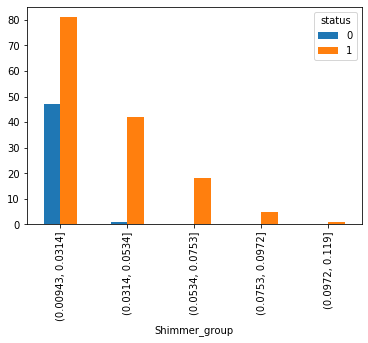

In [71]:

df_temp = df.copy(deep=True)
df_temp['Shimmer_group'] = pd.cut(x=df_temp['Shimmer'],bins=5)
pd.crosstab(df_temp['Shimmer_group'],df_temp['status']).plot(kind='bar')

## Observations on the correlation:
## By looking at the above plot, we can say that this is a good feature in the prediction of PD. When the  Shimmer is lower, the chances of this disease being positive are high and the chances reduce when the Shimmer goes up. 
## So, we will keep this feature in our further analysis.

# Uni-Variate analysis of Shimmer(dB) column:
# We will use histogram for analyzing this feature

Text(0, 0.5, 'Frequency')

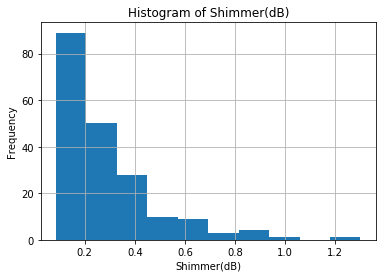

In [72]:
df["Shimmer(dB)"].hist()
plt.title('Histogram of Shimmer(dB)')
plt.xlabel('Shimmer(dB)')
plt.ylabel('Frequency')


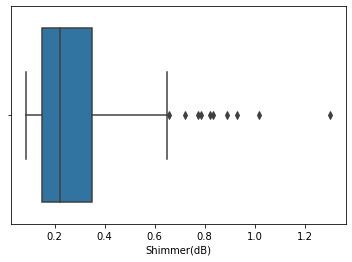

In [73]:
sns.boxplot(x='Shimmer(dB)',data=df)

In [74]:
print(df['Shimmer(dB)'].describe())
print("*"*80)
q75, q25 = np.percentile(df['Shimmer(dB)'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower fence = ", lower_fence)
#print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['Shimmer(dB)'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['Shimmer(dB)'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['Shimmer(dB)'].skew())
print("*"*80)
print("Kurtosis K = ", df['Shimmer(dB)'].kurt())
print("*"*80)


count    195.000000
mean       0.282251
std        0.194877
min        0.085000
25%        0.148500
50%        0.221000
75%        0.350000
max        1.302000
Name: Shimmer(dB), dtype: float64
********************************************************************************
IQR =  0.20149999999999998
There are NO OUTLIERS on the left side of the distribution
There are OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  1.999388639086127
********************************************************************************
Kurtosis K =  5.128192509867997
********************************************************************************


### Basic uni-variate Statistical Observations for Shimmer(dB) feature: 

### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.221000
### Spread is measured by the IQR = 0.20149999999999998

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). The box plot above also tells the same thing. 


# Bi-Variate analysis of Shimmer(dB) column:

In [75]:
df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['Shimmer(dB)']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['Shimmer(dB)']


In [76]:
print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)


********************************************************************************
Distribution for people with No Parkinson's Disease:
count    48.000000
mean      0.162958
std       0.057822
min       0.085000
25%       0.129000
50%       0.154000
75%       0.189250
max       0.405000
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  0.06024999999999997
lower fence =  0.03862500000000005
upper fence =  0.2796249999999999
There are NO OUTLIERS on the left side of this distribution
There are OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  1.744643120820459
********************************************************************************
Kurtosis K =  5.31593156151136
********************************************************************************


********************************************************************************
D

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4]),
 <a list of 8 Text yticklabel objects>)

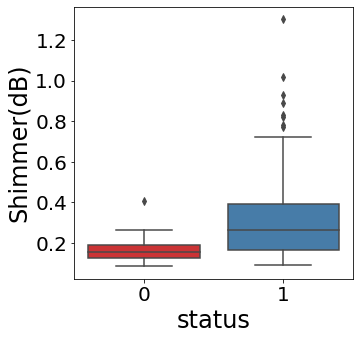

In [77]:
plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='Shimmer(dB)', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('Shimmer(dB)', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


# Basic bivariate Statistical Observations for Shimmer(dB) feature: 
## For people with no Parkinson's Disease(status=0):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.154000
### Spread is measured by the IQR = 0.06024999999999997
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.263000
### Spread is measured by the IQR = 0.2265
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution).




## Correlation between this independant variable and target variable:

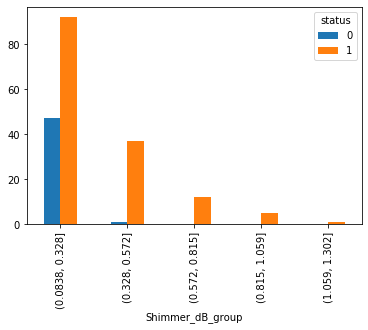

In [78]:
df_temp = df.copy(deep=True)
df_temp['Shimmer_dB_group'] = pd.cut(x=df_temp['Shimmer(dB)'],bins=5)
pd.crosstab(df_temp['Shimmer_dB_group'],df_temp['status']).plot(kind='bar')


## Observations on the correlation:
## By looking at the above plot, we can say that this is a good feature in the prediction of PD. When the  Shimmer(dB) is lower, the chances of this disease being positive are high and the chances reduce when the Shimmer(dB) goes up. 
## So, we will keep this feature in our further analysis.

# Uni-Variate analysis of APQ3 column:
# We will use histogram for analyzing this feature


Text(0, 0.5, 'Frequency')

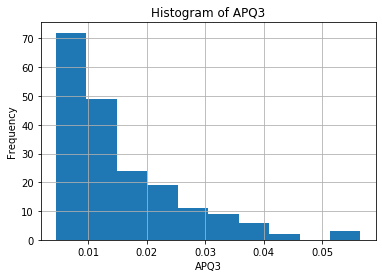

In [79]:
df["APQ3"].hist()
plt.title('Histogram of APQ3')
plt.xlabel('APQ3')
plt.ylabel('Frequency')


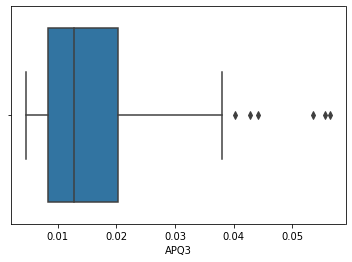

In [80]:

sns.boxplot(x='APQ3',data=df)

In [81]:
print(df['APQ3'].describe())
print("*"*80)
q75, q25 = np.percentile(df['APQ3'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower fence = ", lower_fence)
#print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['APQ3'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['APQ3'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['APQ3'].skew())
print("*"*80)
print("Kurtosis K = ", df['APQ3'].kurt())
print("*"*80)


count    195.000000
mean       0.015664
std        0.010153
min        0.004550
25%        0.008245
50%        0.012790
75%        0.020265
max        0.056470
Name: APQ3, dtype: float64
********************************************************************************
IQR =  0.012019999999999998
There are NO OUTLIERS on the left side of the distribution
There are OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  1.5805763798815677
********************************************************************************
Kurtosis K =  2.7201516395960734
********************************************************************************


### Basic uni-variate Statistical Observations for APQ3 feature: 

### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.012790
### Spread is measured by the IQR = 0.012019999999999998

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). The box plot above also tells the same thing. 



# Bi-Variate analysis of APQ3 column:

In [82]:
df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['APQ3']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['APQ3']


In [83]:
print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)


********************************************************************************
Distribution for people with No Parkinson's Disease:
count    48.000000
mean      0.009504
std       0.003456
min       0.004680
25%       0.007350
50%       0.008775
75%       0.011513
max       0.023360
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  0.004162500000000001
lower fence =  0.001106249999999997
upper fence =  0.01775625
There are NO OUTLIERS on the left side of this distribution
There are OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  1.4959429655185739
********************************************************************************
Kurtosis K =  4.171551124780184
********************************************************************************


********************************************************************************
Distr

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]),
 <a list of 7 Text yticklabel objects>)

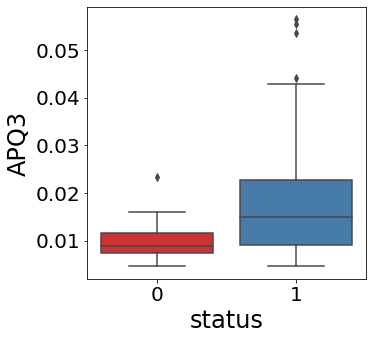

In [84]:
plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='APQ3', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('APQ3', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


# Basic bivariate Statistical Observations for APQ3 feature: 
## For people with no Parkinson's Disease(status=0):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.008775
### Spread is measured by the IQR = 0.004162500000000001
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.014840
### Spread is measured by the IQR = 0.013679999999999998
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution).



## Correlation between this independant variable and target variable:

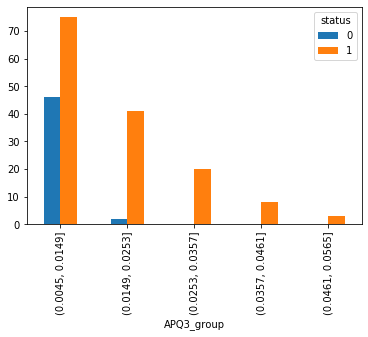

In [85]:
df_temp = df.copy(deep=True)
df_temp['APQ3_group'] = pd.cut(x=df_temp['APQ3'],bins=5)
pd.crosstab(df_temp['APQ3_group'],df_temp['status']).plot(kind='bar')


## Observations on the correlation:
## By looking at the above plot, we can say that this is a good feature in the prediction of PD. When the  APQ3 is lower, the chances of this disease being positive are high and the chances reduce when the APQ3 goes up. 
## So, we will keep this feature in our further analysis.

# Uni-Variate analysis of APQ5 column:
# We will use histogram for analyzing this feature

Text(0, 0.5, 'Frequency')

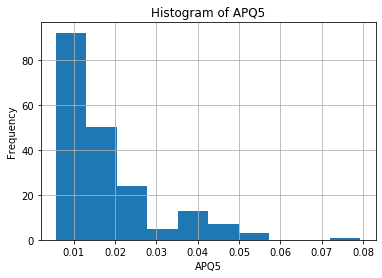

In [86]:
df["APQ5"].hist()
plt.title('Histogram of APQ5')
plt.xlabel('APQ5')
plt.ylabel('Frequency')


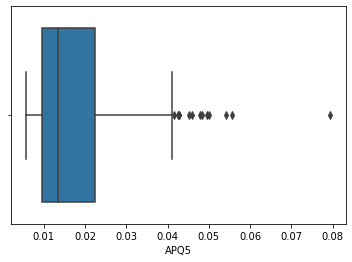

In [87]:
sns.boxplot(x='APQ5',data=df)

In [88]:
print(df['APQ5'].describe())
print("*"*80)
q75, q25 = np.percentile(df['APQ5'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower fence = ", lower_fence)
#print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['APQ5'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['APQ5'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['APQ5'].skew())
print("*"*80)
print("Kurtosis K = ", df['APQ5'].kurt())
print("*"*80)


count    195.000000
mean       0.017878
std        0.012024
min        0.005700
25%        0.009580
50%        0.013470
75%        0.022380
max        0.079400
Name: APQ5, dtype: float64
********************************************************************************
IQR =  0.012799999999999999
There are NO OUTLIERS on the left side of the distribution
There are OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  1.798697066537622
********************************************************************************
Kurtosis K =  3.8742096517587257
********************************************************************************


### Basic uni-variate Statistical Observations for APQ5 feature: 

### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.013470
### Spread is measured by the IQR = 0.012799999999999999

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). The box plot above also tells the same thing. 


# Bi-Variate analysis of APQ5 column:

In [89]:
df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['APQ5']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['APQ5']

In [90]:
print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)


********************************************************************************
Distribution for people with No Parkinson's Disease:
count    48.000000
mean      0.010509
std       0.003231
min       0.006060
25%       0.008193
50%       0.010225
75%       0.011980
max       0.024980
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  0.003787499999999999
lower fence =  0.0025112500000000013
upper fence =  0.017661249999999996
There are NO OUTLIERS on the left side of this distribution
There are OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  2.0054121360352357
********************************************************************************
Kurtosis K =  7.51835298753628
********************************************************************************


****************************************************************************

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
 <a list of 10 Text yticklabel objects>)

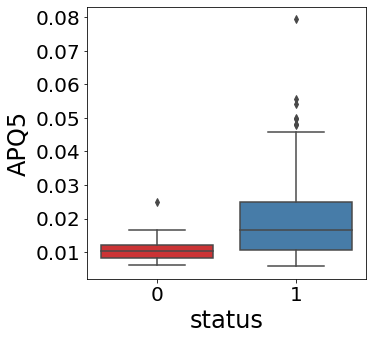

In [91]:
plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='APQ5', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('APQ5', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Basic bivariate Statistical Observations for APQ5 feature: 
## For people with no Parkinson's Disease(status=0):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.010225
### Spread is measured by the IQR = 0.003787499999999999
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.016500
### Spread is measured by the IQR = 0.01436
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution).



## Correlation between this independant variable and target variable:


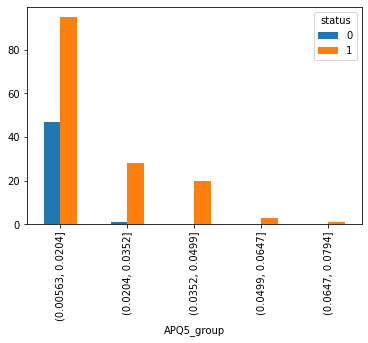

In [92]:
df_temp = df.copy(deep=True)
df_temp['APQ5_group'] = pd.cut(x=df_temp['APQ5'],bins=5)
pd.crosstab(df_temp['APQ5_group'],df_temp['status']).plot(kind='bar')


## Observations on the correlation:
## By looking at the above plot, we can say that this is a good feature in the prediction of PD. When the  APQ5 is lower, the chances of this disease being positive are high and the chances reduce when the APQ5 goes up. 
## So, we will keep this feature in our further analysis.

# Uni-Variate analysis of APQ column:
# We will use histogram for analyzing this feature

Text(0, 0.5, 'Frequency')

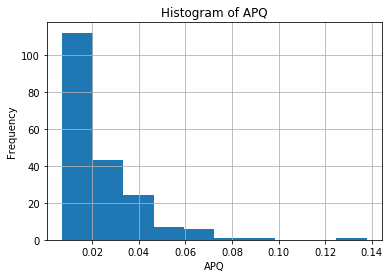

In [93]:
df["APQ"].hist()
plt.title('Histogram of APQ')
plt.xlabel('APQ')
plt.ylabel('Frequency')


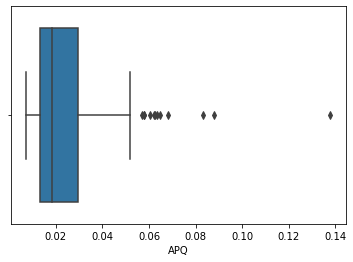

In [94]:
sns.boxplot(x='APQ',data=df)

In [95]:
print(df['APQ'].describe())
print("*"*80)
q75, q25 = np.percentile(df['APQ'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower fence = ", lower_fence)
#print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['APQ'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['APQ'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['APQ'].skew())
print("*"*80)
print("Kurtosis K = ", df['APQ'].kurt())
print("*"*80)


count    195.000000
mean       0.024081
std        0.016947
min        0.007190
25%        0.013080
50%        0.018260
75%        0.029400
max        0.137780
Name: APQ, dtype: float64
********************************************************************************
IQR =  0.01632
There are NO OUTLIERS on the left side of the distribution
There are OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  2.618046502215422
********************************************************************************
Kurtosis K =  11.163288378025502
********************************************************************************


### Basic uni-variate Statistical Observations for APQ feature: 

### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.018260
### Spread is measured by the IQR = 0.01632

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). The box plot above also tells the same thing. 


# Bi-Variate analysis of APQ column:

In [96]:
df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['APQ']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['APQ']


In [97]:
print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)

********************************************************************************
Distribution for people with No Parkinson's Disease:
count    48.000000
mean      0.013305
std       0.003825
min       0.007190
25%       0.011235
50%       0.013015
75%       0.015945
max       0.027450
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  0.004710000000000001
lower fence =  0.004169999999999999
upper fence =  0.023010000000000003
There are NO OUTLIERS on the left side of this distribution
There are OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  1.043889314612399
********************************************************************************
Kurtosis K =  2.6195259730325526
********************************************************************************


****************************************************************************

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16]),
 <a list of 9 Text yticklabel objects>)

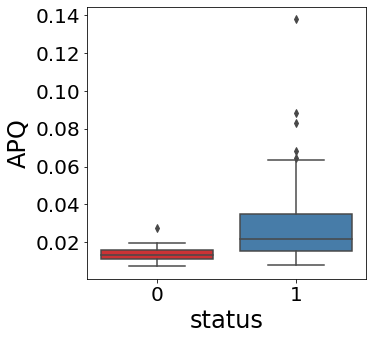

In [98]:
plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='APQ', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('APQ', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)



# Basic bivariate Statistical Observations for APQ feature: 
## For people with no Parkinson's Disease(status=0):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.013015
### Spread is measured by the IQR = 0.00471
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.021570
### Spread is measured by the IQR = 0.01927
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution).


## Correlation between this independant variable and target variable:

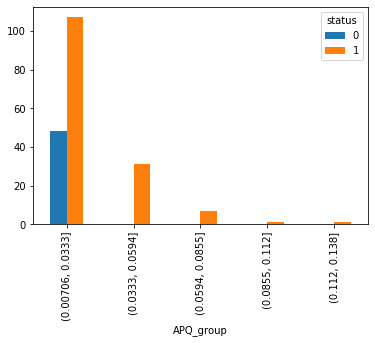

In [99]:
df_temp = df.copy(deep=True)
df_temp['APQ_group'] = pd.cut(x=df_temp['APQ'],bins=5)
pd.crosstab(df_temp['APQ_group'],df_temp['status']).plot(kind='bar')


## Observations on the correlation:
## By looking at the above plot, we can say that this is a good feature in the prediction of PD. When the  APQ is lower, the chances of this disease being positive are high and the chances reduce when the APQ goes up. 
## So, we will keep this feature in our further analysis.

# Uni-Variate analysis of DDA column:
# We will use histogram for analyzing this feature

Text(0, 0.5, 'Frequency')

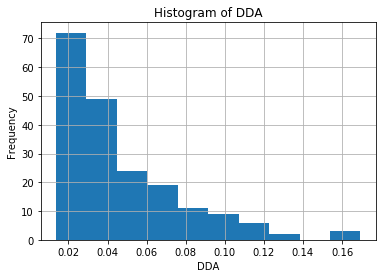

In [100]:
df["DDA"].hist()
plt.title('Histogram of DDA')
plt.xlabel('DDA')
plt.ylabel('Frequency')


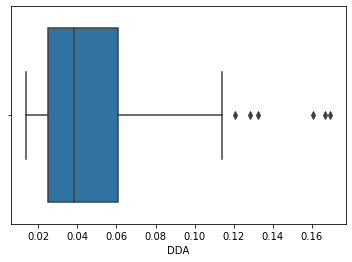

In [101]:
sns.boxplot(x='DDA',data=df)

In [102]:
print(df['DDA'].describe())
print("*"*80)
q75, q25 = np.percentile(df['DDA'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower fence = ", lower_fence)
#print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['DDA'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['DDA'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['DDA'].skew())
print("*"*80)
print("Kurtosis K = ", df['DDA'].kurt())
print("*"*80)


count    195.000000
mean       0.046993
std        0.030459
min        0.013640
25%        0.024735
50%        0.038360
75%        0.060795
max        0.169420
Name: DDA, dtype: float64
********************************************************************************
IQR =  0.03606
There are NO OUTLIERS on the left side of the distribution
There are OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  1.5806179936782263
********************************************************************************
Kurtosis K =  2.720661344498221
********************************************************************************


### Basic uni-variate Statistical Observations for DDA feature: 

### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.038360
### Spread is measured by the IQR = 0.03606

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). The box plot above also tells the same thing. 


# Bi-Variate analysis of DDA column:

In [103]:
df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['DDA']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['DDA']


In [104]:
print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)


********************************************************************************
Distribution for people with No Parkinson's Disease:
count    48.000000
mean      0.028511
std       0.010368
min       0.014030
25%       0.022060
50%       0.026330
75%       0.034540
max       0.070080
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  0.012479999999999998
lower fence =  0.003340000000000006
upper fence =  0.05326
There are NO OUTLIERS on the left side of this distribution
There are OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  1.4956571775444216
********************************************************************************
Kurtosis K =  4.1704565148572605
********************************************************************************


********************************************************************************
Distrib

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18]),
 <a list of 10 Text yticklabel objects>)

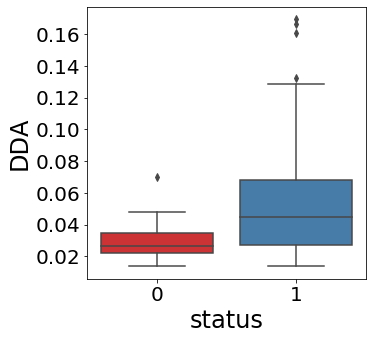

In [105]:
plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='DDA', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('DDA', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


# Basic bivariate Statistical Observations for DDA feature: 
## For people with no Parkinson's Disease(status=0):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.026330
### Spread is measured by the IQR = 0.01248
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.044510
### Spread is measured by the IQR = 0.041055
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution).


## Correlation between this independant variable and target variable:

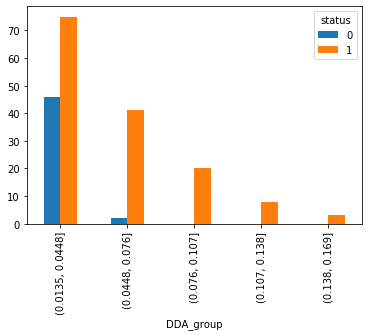

In [106]:
df_temp = df.copy(deep=True)
df_temp['DDA_group'] = pd.cut(x=df_temp['DDA'],bins=5)
pd.crosstab(df_temp['DDA_group'],df_temp['status']).plot(kind='bar')


## Observations on the correlation:
## By looking at the above plot, we can say that this is a good feature in the prediction of PD. When the  DDA is lower, the chances of this disease being positive are high and the chances reduce when the DDA goes up. 
## So, we will keep this feature in our further analysis.

# Uni-Variate analysis of NHR column:
# We will use histogram for analyzing this feature


Text(0, 0.5, 'Frequency')

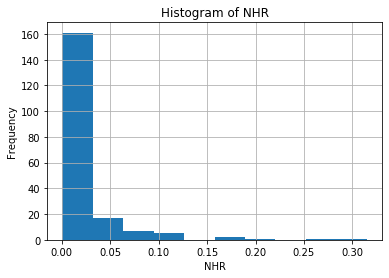

In [107]:
df["NHR"].hist()
plt.title('Histogram of NHR')
plt.xlabel('NHR')
plt.ylabel('Frequency')


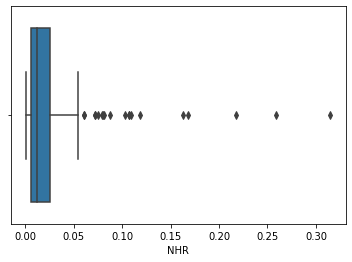

In [108]:
sns.boxplot(x='NHR',data=df)

In [109]:
print(df['NHR'].describe())
print("*"*80)
q75, q25 = np.percentile(df['NHR'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower fence = ", lower_fence)
#print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['NHR'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['NHR'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['NHR'].skew())
print("*"*80)
print("Kurtosis K = ", df['NHR'].kurt())
print("*"*80)


count    195.000000
mean       0.024847
std        0.040418
min        0.000650
25%        0.005925
50%        0.011660
75%        0.025640
max        0.314820
Name: NHR, dtype: float64
********************************************************************************
IQR =  0.019715
There are NO OUTLIERS on the left side of the distribution
There are OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  4.22070912913906
********************************************************************************
Kurtosis K =  21.994974114984924
********************************************************************************


### Basic uni-variate Statistical Observations for NHR feature: 

### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.011660
### Spread is measured by the IQR = 0.019715

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). The box plot above also tells the same thing. 


# Bi-Variate analysis of NHR column:

In [110]:
df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['NHR']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['NHR']


In [111]:
print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)


********************************************************************************
Distribution for people with No Parkinson's Disease:
count    48.000000
mean      0.011483
std       0.019088
min       0.000650
25%       0.004188
50%       0.004825
75%       0.009213
max       0.107150
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  0.005025
lower fence =  -0.0033499999999999997
upper fence =  0.01675
There are NO OUTLIERS on the left side of this distribution
There are OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  3.7021452088065954
********************************************************************************
Kurtosis K =  14.98294662895088
********************************************************************************


********************************************************************************
Distribution for p

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35]),
 <a list of 9 Text yticklabel objects>)

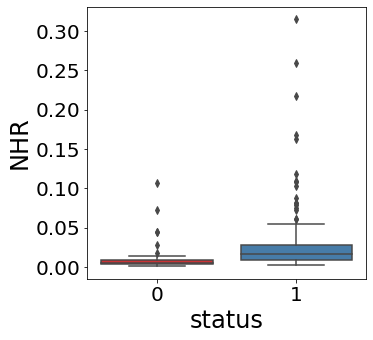

In [112]:
plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='NHR', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('NHR', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


# Basic bivariate Statistical Observations for NHR feature: 
## For people with no Parkinson's Disease(status=0):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.004825
### Spread is measured by the IQR = 0.005025
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.016580
### Spread is measured by the IQR = 0.019515
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution).


## Correlation between this independant variable and target variable:

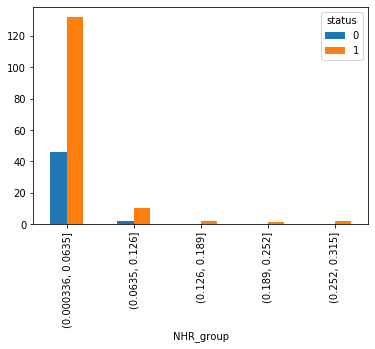

In [113]:
df_temp = df.copy(deep=True)
df_temp['NHR_group'] = pd.cut(x=df_temp['NHR'],bins=5)
pd.crosstab(df_temp['NHR_group'],df_temp['status']).plot(kind='bar')



## Observations on the correlation:
## By looking at the above plot, we can say that this is a good feature in the prediction of PD. When the  NHR is lower, the chances of this disease being positive are high and the chances reduce when the NHR goes up. 
## So, we will keep this feature in our further analysis.

# Uni-Variate analysis of HNR column:
# We will use histogram for analyzing this feature


Text(0, 0.5, 'Frequency')

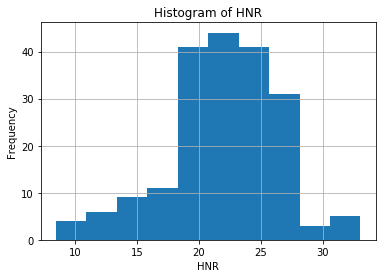

In [114]:
df["HNR"].hist()
plt.title('Histogram of HNR')
plt.xlabel('HNR')
plt.ylabel('Frequency')


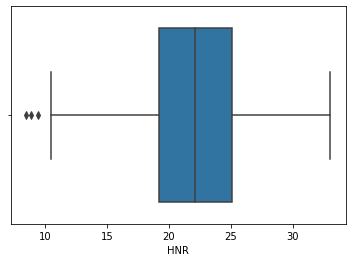

In [115]:
sns.boxplot(x='HNR',data=df)

In [116]:
print(df['HNR'].describe())
print("*"*80)
q75, q25 = np.percentile(df['HNR'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower fence = ", lower_fence)
#print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['HNR'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['HNR'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['HNR'].skew())
print("*"*80)
print("Kurtosis K = ", df['HNR'].kurt())
print("*"*80)


count    195.000000
mean      21.885974
std        4.425764
min        8.441000
25%       19.198000
50%       22.085000
75%       25.075500
max       33.047000
Name: HNR, dtype: float64
********************************************************************************
IQR =  5.877499999999998
There are OUTLIERS on the left side of the distribution
There are NO OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  -0.5143174975652068
********************************************************************************
Kurtosis K =  0.6160358344019841
********************************************************************************


### Basic uni-variate Statistical Observations for HNR feature: 

### Since there are outliers in this distribution, 
### Central value is measured by Median = 22.085000
### Spread is measured by the IQR = 5.8775

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a positive kurtosis(more number of outliers) and negative skew(left-skewed distribution). The box plot above also tells the same thing. 


# Bi-Variate analysis of HNR column:

In [117]:
df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['HNR']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['HNR']


In [118]:
print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)


********************************************************************************
Distribution for people with No Parkinson's Disease:
count    48.00000
mean     24.67875
std       3.43454
min      17.88300
25%      22.99325
50%      24.99700
75%      26.13925
max      33.04700
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  3.146000000000001
lower fence =  18.27425
upper fence =  30.85825
There are OUTLIERS on the left side of this distribution
There are OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  0.3637582534001984
********************************************************************************
Kurtosis K =  0.556227491717626
********************************************************************************


********************************************************************************
Distribution for people with Park

(array([ 5., 10., 15., 20., 25., 30., 35.]),
 <a list of 7 Text yticklabel objects>)

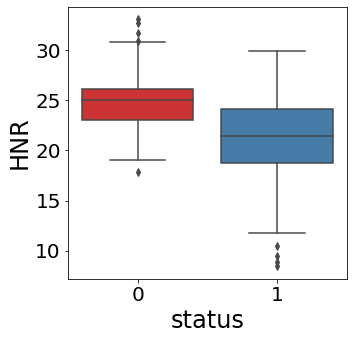

In [119]:
plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='HNR', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('HNR', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


# Basic bivariate Statistical Observations for HNR feature: 
## For people with no Parkinson's Disease(status=0):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 24.99700
### Spread is measured by the IQR = 3.146
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 21.414000
### Spread is measured by the IQR = 5.3825
### This feature has a positive kurtosis(more number of outliers) and negative skew(left-skewed distribution).


## Correlation between this independant variable and target variable:

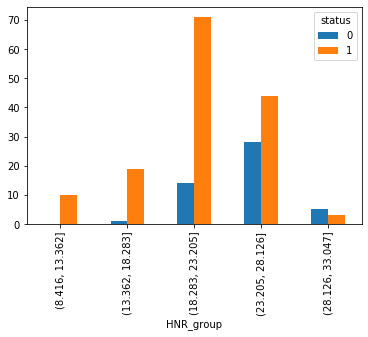

In [120]:
df_temp = df.copy(deep=True)
df_temp['HNR_group'] = pd.cut(x=df_temp['HNR'],bins=5)
pd.crosstab(df_temp['HNR_group'],df_temp['status']).plot(kind='bar')


## Observations on the correlation:
## By looking at the above plot, we can say that this is a good feature in the prediction of PD. When the  HNR is lower, the chances of this disease being positive are high and the chances reduce when the HNR goes up. 
## So, we will keep this feature in our further analysis.

# Uni-Variate analysis of RPDE column:
# We will use histogram for analyzing this feature


Text(0, 0.5, 'Frequency')

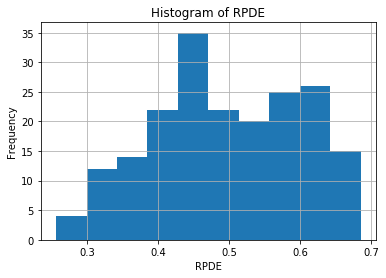

In [121]:
df["RPDE"].hist()
plt.title('Histogram of RPDE')
plt.xlabel('RPDE')
plt.ylabel('Frequency')



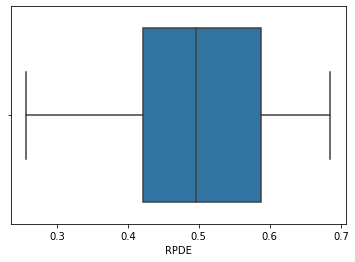

In [122]:
sns.boxplot(x='RPDE',data=df)

In [123]:
print(df['RPDE'].describe())
print("*"*80)
q75, q25 = np.percentile(df['RPDE'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower fence = ", lower_fence)
#print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['RPDE'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['RPDE'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['RPDE'].skew())
print("*"*80)
print("Kurtosis K = ", df['RPDE'].kurt())
print("*"*80)


count    195.000000
mean       0.498536
std        0.103942
min        0.256570
25%        0.421306
50%        0.495954
75%        0.587562
max        0.685151
Name: RPDE, dtype: float64
********************************************************************************
IQR =  0.16625649999999997
There are NO OUTLIERS on the left side of the distribution
There are NO OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  -0.14340241379821705
********************************************************************************
Kurtosis K =  -0.9217809777573227
********************************************************************************


### Basic uni-variate Statistical Observations for RPDE feature: 

### Since there are NO outliers in this distribution, 
### Central value is measured by Mean = 0.498536
### Spread is measured by the SD = 0.103942

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a negative kurtosis(less number of outliers) and negative skew(left-skewed distribution). The box plot above also tells the same thing. 


# Bi-Variate analysis of RPDE column:

In [124]:
df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['RPDE']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['RPDE']


In [125]:
print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)


********************************************************************************
Distribution for people with No Parkinson's Disease:
count    48.000000
mean      0.442552
std       0.092199
min       0.256570
25%       0.372126
50%       0.435368
75%       0.507748
max       0.663842
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  0.13562199999999996
lower fence =  0.16869275000000003
upper fence =  0.7111807499999999
There are NO OUTLIERS on the left side of this distribution
There are NO OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  0.31143859651989075
********************************************************************************
Kurtosis K =  -0.2675572775744972
********************************************************************************


**************************************************************************

(array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
 <a list of 7 Text yticklabel objects>)

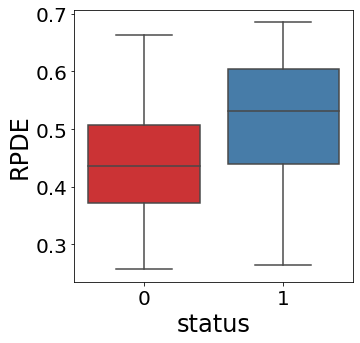

In [126]:
plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='RPDE', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('RPDE', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)



# Basic bivariate Statistical Observations for RPDE feature: 
## For people with no Parkinson's Disease(status=0):
### Since there are NO outliers in this distribution, 
### Central value is measured by Mean = 0.442552
### Spread is measured by the SD = 0.092199
### This feature has a negative kurtosis(less number of outliers) and positive skew(right-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are NO outliers in this distribution, 
### Central value is measured by Mean = 0.516816
### Spread is measured by the SD = 0.101254
### This feature has a negative kurtosis(less number of outliers) and negative skew(left-skewed distribution).



## Correlation between this independant variable and target variable:

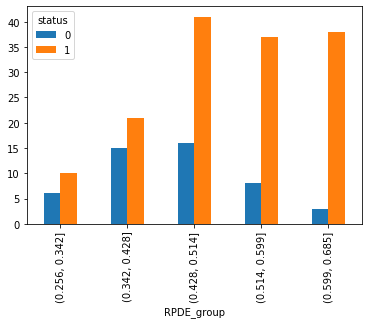

In [127]:
df_temp = df.copy(deep=True)
df_temp['RPDE_group'] = pd.cut(x=df_temp['RPDE'],bins=5)
pd.crosstab(df_temp['RPDE_group'],df_temp['status']).plot(kind='bar')


## Observations on the correlation:
## By looking at the above plot, we can say that this is a good feature in the prediction of PD. When the  RPDE is lower, the chances of this disease being positive are low and the chances increase when the RPDE goes up. 
## So, we will keep this feature in our further analysis.

# Uni-Variate analysis of DFA column:
# We will use histogram for analyzing this feature


Text(0, 0.5, 'Frequency')

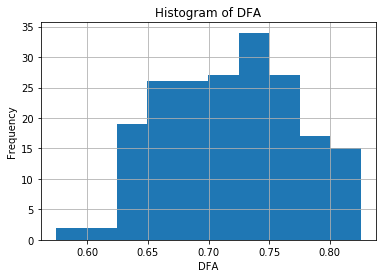

In [128]:

df["DFA"].hist()
plt.title('Histogram of DFA')
plt.xlabel('DFA')
plt.ylabel('Frequency')


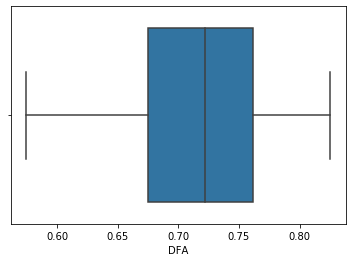

In [129]:

sns.boxplot(x='DFA',data=df)

In [130]:
print(df['DFA'].describe())
print("*"*80)
q75, q25 = np.percentile(df['DFA'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower fence = ", lower_fence)
#print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['DFA'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['DFA'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['DFA'].skew())
print("*"*80)
print("Kurtosis K = ", df['DFA'].kurt())
print("*"*80)


count    195.000000
mean       0.718099
std        0.055336
min        0.574282
25%        0.674758
50%        0.722254
75%        0.761881
max        0.825288
Name: DFA, dtype: float64
********************************************************************************
IQR =  0.08712399999999998
There are NO OUTLIERS on the left side of the distribution
There are NO OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  -0.03321366071383484
********************************************************************************
Kurtosis K =  -0.6861518492559342
********************************************************************************


### Basic uni-variate Statistical Observations for DFA feature: 

### Since there are NO outliers in this distribution, 
### Central value is measured by Mean = 0.718099
### Spread is measured by the SD = 0.087124

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a negative kurtosis(less number of outliers) and negative skew(left-skewed distribution). The box plot above also tells the same thing. 


# Bi-Variate analysis of DFA column:

In [131]:
df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['DFA']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['DFA']


In [132]:
print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)

********************************************************************************
Distribution for people with No Parkinson's Disease:
count    48.000000
mean      0.695716
std       0.051346
min       0.626710
25%       0.654291
50%       0.682527
75%       0.742284
max       0.785714
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  0.08799275000000006
lower fence =  0.522302125
upper fence =  0.8742731250000002
There are NO OUTLIERS on the left side of this distribution
There are NO OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  0.27866501515292924
********************************************************************************
Kurtosis K =  -1.4841778159888572
********************************************************************************


********************************************************************************
D

(array([0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85]),
 <a list of 7 Text yticklabel objects>)

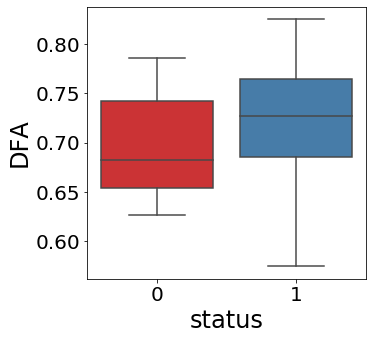

In [133]:
plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='DFA', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('DFA', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)



# Basic bivariate Statistical Observations for DFA feature: 
## For people with no Parkinson's Disease(status=0):
### Since there are NO outliers in this distribution, 
### Central value is measured by Mean = 0.695716
### Spread is measured by the SD = 0.051346
### This feature has a negative kurtosis(less number of outliers) and positive skew(right-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are NO outliers in this distribution, 
### Central value is measured by Mean = 0.725408
### Spread is measured by the SD = 0.054786
### This feature has a negative kurtosis(less number of outliers) and negative skew(left-skewed distribution).


## Correlation between this independant variable and target variable:

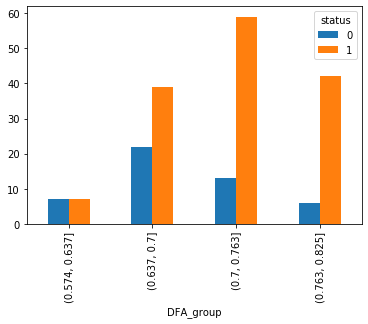

In [134]:
df_temp = df.copy(deep=True)
df_temp['DFA_group'] = pd.cut(x=df_temp['DFA'],bins=4)
pd.crosstab(df_temp['DFA_group'],df_temp['status']).plot(kind='bar')


## Observations on the correlation:
## By looking at the above plot, we can say that this is a decent feature in the prediction of PD. When the  DFA is lower, the chances of this disease being positive are low and the chances increase when the DFA goes up. 
## So, we will keep this feature in our further analysis.

# Uni-Variate analysis of spread1 column:
# We will use histogram for analyzing this feature


Text(0, 0.5, 'Frequency')

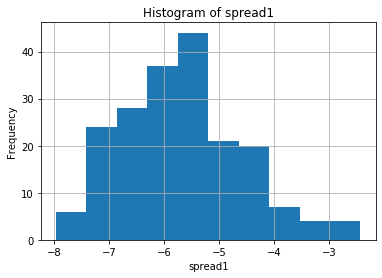

In [135]:
df["spread1"].hist()
plt.title('Histogram of spread1')
plt.xlabel('spread1')
plt.ylabel('Frequency')


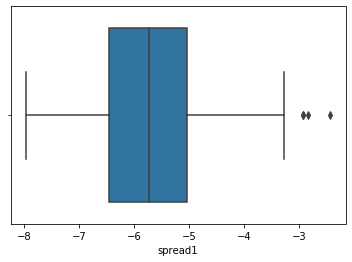

In [136]:
sns.boxplot(x='spread1',data=df)

In [137]:
print(df['spread1'].describe())
print("*"*80)
q75, q25 = np.percentile(df['spread1'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower fence = ", lower_fence)
#print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['spread1'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['spread1'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['spread1'].skew())
print("*"*80)
print("Kurtosis K = ", df['spread1'].kurt())
print("*"*80)


count    195.000000
mean      -5.684397
std        1.090208
min       -7.964984
25%       -6.450096
50%       -5.720868
75%       -5.046192
max       -2.434031
Name: spread1, dtype: float64
********************************************************************************
IQR =  1.4039040000000007
There are NO OUTLIERS on the left side of the distribution
There are OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  0.4321389320131796
********************************************************************************
Kurtosis K =  -0.05019918161280801
********************************************************************************


### Basic uni-variate Statistical Observations for spread1 feature: 

### Since there are outliers in this distribution, 
### Central value is measured by Median = 5.720868
### Spread is measured by the IQR = 1.4039040000000007

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a negative kurtosis(less number of outliers) and positive skew(right-skewed distribution). The box plot above also tells the same thing. 


# Bi-Variate analysis of spread1 column:

In [138]:
df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['spread1']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['spread1']


In [139]:
print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)


********************************************************************************
Distribution for people with No Parkinson's Disease:
count    48.000000
mean     -6.759264
std       0.642782
min      -7.964984
25%      -7.257665
50%      -6.826448
75%      -6.350146
max      -5.198864
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  0.9075189999999997
lower fence =  -8.61894375
upper fence =  -4.988867750000001
There are NO OUTLIERS on the left side of this distribution
There are NO OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  0.41453153931456754
********************************************************************************
Kurtosis K =  -0.4251925317144605
********************************************************************************


********************************************************************************
Di

(array([-9., -8., -7., -6., -5., -4., -3., -2.]),
 <a list of 8 Text yticklabel objects>)

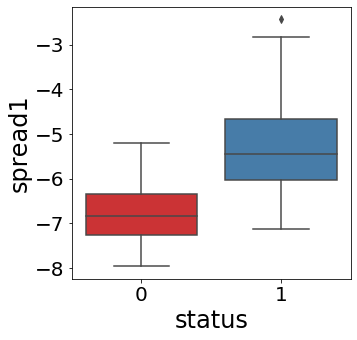

In [140]:
plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='spread1', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('spread1', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


# Basic bivariate Statistical Observations for spread1 feature: 
## For people with no Parkinson's Disease(status=0):
### Since there are NO outliers in this distribution, 
### Central value is measured by Mean = 6.759264
### Spread is measured by the SD = 0.642782
### This feature has a negative kurtosis(less number of outliers) and positive skew(right-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 5.440040
### Spread is measured by the IQR = 1.3742325
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution).


## Correlation between this independant variable and target variable:

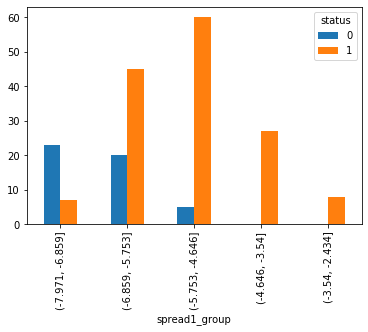

In [141]:
df_temp = df.copy(deep=True)
df_temp['spread1_group'] = pd.cut(x=df_temp['spread1'],bins=5)
pd.crosstab(df_temp['spread1_group'],df_temp['status']).plot(kind='bar')


## Observations on the correlation:
## By looking at the above plot, we can say that this is a good feature in the prediction of PD. When the  spread1 is lower, the chances of this disease being positive are low and the chances increase when the spread1 goes up. And when  spread1 goes beyond a point, chance of this disease being positive comes down.
## So, we will keep this feature in our further analysis.

# Uni-Variate analysis of spread2 column:
# We will use histogram for analyzing this feature

Text(0, 0.5, 'Frequency')

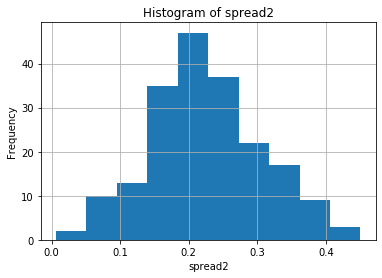

In [142]:

df["spread2"].hist()
plt.title('Histogram of spread2')
plt.xlabel('spread2')
plt.ylabel('Frequency')

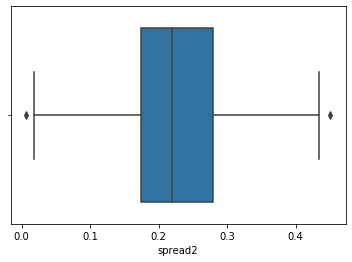

In [143]:

sns.boxplot(x='spread2',data=df)

In [144]:

print(df['spread2'].describe())
print("*"*80)
q75, q25 = np.percentile(df['spread2'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower fence = ", lower_fence)
#print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['spread2'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['spread2'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['spread2'].skew())
print("*"*80)
print("Kurtosis K = ", df['spread2'].kurt())
print("*"*80)

count    195.000000
mean       0.226510
std        0.083406
min        0.006274
25%        0.174351
50%        0.218885
75%        0.279234
max        0.450493
Name: spread2, dtype: float64
********************************************************************************
IQR =  0.10488349999999996
There are OUTLIERS on the left side of the distribution
There are OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  0.14443048549278412
********************************************************************************
Kurtosis K =  -0.08302289327680024
********************************************************************************



### Basic uni-variate Statistical Observations for spread2 feature: 

### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.218885
### Spread is measured by the IQR = 0.1048835

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a negative kurtosis(less number of outliers) and positive skew(right-skewed distribution). The box plot above also tells the same thing. 

# Bi-Variate analysis of spread2 column:

In [145]:

df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['spread2']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['spread2']

In [146]:

print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)

********************************************************************************
Distribution for people with No Parkinson's Disease:
count    48.000000
mean      0.160292
std       0.062982
min       0.006274
25%       0.120623
50%       0.167356
75%       0.193766
max       0.291954
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  0.07314275
lower fence =  0.010908874999999998
upper fence =  0.303479875
There are OUTLIERS on the left side of this distribution
There are NO OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  -0.25388936365094505
********************************************************************************
Kurtosis K =  0.1156818704850604
********************************************************************************


********************************************************************************
Distributio

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 7 Text yticklabel objects>)

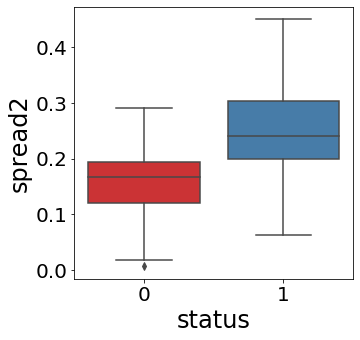

In [147]:

plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='spread2', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('spread2', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)



# Basic bivariate Statistical Observations for spread2 feature: 
## For people with no Parkinson's Disease(status=0):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.167356
### Spread is measured by the IQR = 0.07314275
### This feature has a positive kurtosis(more number of outliers) and negative skew(left-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are outliers in this distribution, 
### Central value is measured by Mean = 0.248133
### Spread is measured by the SD = 0.077809
### This feature has a negative kurtosis(less number of outliers) and positive skew(right-skewed distribution).

## Correlation between this independant variable and target variable:

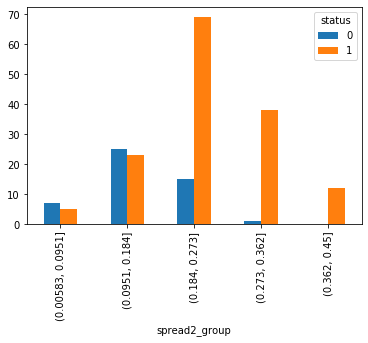

In [148]:

df_temp = df.copy(deep=True)
df_temp['spread2_group'] = pd.cut(x=df_temp['spread2'],bins=5)
pd.crosstab(df_temp['spread2_group'],df_temp['status']).plot(kind='bar')



## Observations on the correlation:
## By looking at the above plot, we can say that this is a good feature in the prediction of PD. When the  spread2 is lower, the chances of this disease being positive are low and the chances increase when the spread2 goes up. And when  spread2 goes beyond a point, chance of this disease being positive comes down.
## So, we will keep this feature in our further analysis.

# Uni-Variate analysis of D2 column:
# We will use histogram for analyzing this feature

Text(0, 0.5, 'Frequency')

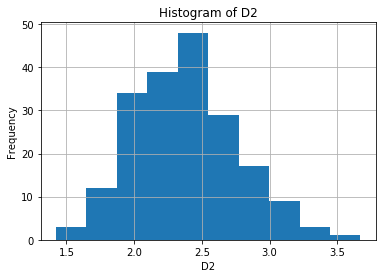

In [149]:

df["D2"].hist()
plt.title('Histogram of D2')
plt.xlabel('D2')
plt.ylabel('Frequency')

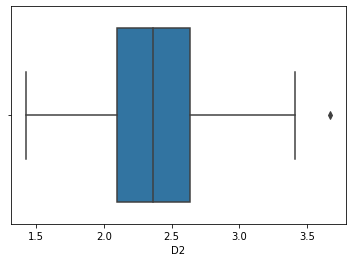

In [150]:

sns.boxplot(x='D2',data=df)

In [151]:

print(df['D2'].describe())
print("*"*80)
q75, q25 = np.percentile(df['D2'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower fence = ", lower_fence)
#print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['D2'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['D2'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['D2'].skew())
print("*"*80)
print("Kurtosis K = ", df['D2'].kurt())
print("*"*80)

count    195.000000
mean       2.381826
std        0.382799
min        1.423287
25%        2.099125
50%        2.361532
75%        2.636456
max        3.671155
Name: D2, dtype: float64
********************************************************************************
IQR =  0.5373304999999999
There are NO OUTLIERS on the left side of the distribution
There are OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  0.4303838913329283
********************************************************************************
Kurtosis K =  0.22033410480833515
********************************************************************************



### Basic uni-variate Statistical Observations for D2 feature: 

### Since there are outliers in this distribution, 
### Central value is measured by Median = 2.361532
### Spread is measured by the IQR = 0.5373304999999999

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). The box plot above also tells the same thing. 



# Bi-Variate analysis of D2 column:

In [152]:

df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['D2']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['D2']


In [153]:
print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)

********************************************************************************
Distribution for people with No Parkinson's Disease:
count    48.000000
mean      2.154491
std       0.310269
min       1.423287
25%       1.974217
50%       2.129510
75%       2.339487
max       2.882450
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  0.3652700000000002
lower fence =  1.4263119999999996
upper fence =  2.887392
There are OUTLIERS on the left side of this distribution
There are NO OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  0.007316162268827913
********************************************************************************
Kurtosis K =  0.2583848412586649
********************************************************************************


********************************************************************************
Distribu

(array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 <a list of 7 Text yticklabel objects>)

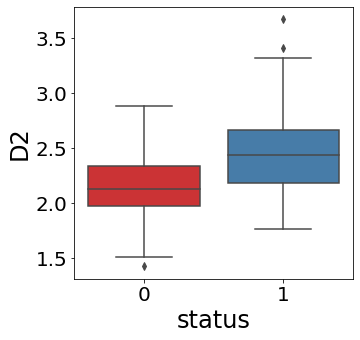

In [154]:

plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='D2', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('D2', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)



# Basic bivariate Statistical Observations for D2 feature: 
## For people with no Parkinson's Disease(status=0):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 2.129510
### Spread is measured by the IQR = 0.3652700000000002
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 2.439597
### Spread is measured by the IQR = 0.48754600000000003
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution).




## Correlation between this independant variable and target variable:


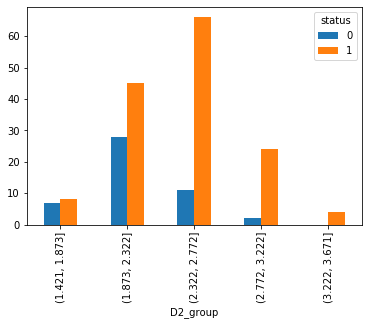

In [155]:

df_temp = df.copy(deep=True)
df_temp['D2_group'] = pd.cut(x=df_temp['D2'],bins=5)
pd.crosstab(df_temp['D2_group'],df_temp['status']).plot(kind='bar')



## Observations on the correlation:
## By looking at the above plot, we can say that this is a good feature in the prediction of PD. When the  D2 is lower, the chances of this disease being positive are low and the chances increase when the D2 goes up. And when  D2 goes beyond a point, chance of this disease being positive comes down.
## So, we will keep this feature in our further analysis.

# Uni-Variate analysis of PPE column:
# We will use histogram for analyzing this feature

Text(0, 0.5, 'Frequency')

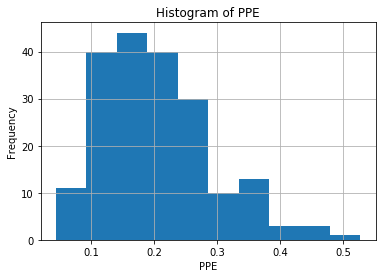

In [156]:

df["PPE"].hist()
plt.title('Histogram of PPE')
plt.xlabel('PPE')
plt.ylabel('Frequency')

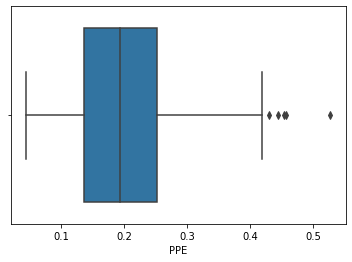

In [157]:

sns.boxplot(x='PPE',data=df)

In [158]:
print(df['PPE'].describe())
print("*"*80)
q75, q25 = np.percentile(df['PPE'], [75,25])
iqr = q75 - q25
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
#print("lower fence = ", lower_fence)
#print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df['PPE'].min() < lower_fence):
    print("There are OUTLIERS on the left side of the distribution")
else:
    print("There are NO OUTLIERS on the left side of the distribution")

#checking the outliers on the right side of the distribution
if(df['PPE'].max() > upper_fence):
    print("There are OUTLIERS on the right side of the distribution")
else:
    print("There are NO OUTLIERS on the right side of the distribution")
print("*"*80)
print("Skew = ", df['PPE'].skew())
print("*"*80)
print("Kurtosis K = ", df['PPE'].kurt())
print("*"*80)

count    195.000000
mean       0.206552
std        0.090119
min        0.044539
25%        0.137451
50%        0.194052
75%        0.252980
max        0.527367
Name: PPE, dtype: float64
********************************************************************************
IQR =  0.11552899999999999
There are NO OUTLIERS on the left side of the distribution
There are OUTLIERS on the right side of the distribution
********************************************************************************
Skew =  0.7974910716463578
********************************************************************************
Kurtosis K =  0.5283349472852588
********************************************************************************



### Basic uni-variate Statistical Observations for PPE feature: 

### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.194052
### Spread is measured by the IQR = 0.11552899999999999

### skewness refers to the degree of symmetry. Kurtosis refers to the degree of presence of outliers in the distribution. As the tails of a distribution become heavier(more outliers), the kurtosis value will increase. As the tails become lighter(less outliers), the kurtosis value will decrease.

### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). The box plot above also tells the same thing. 


# Bi-Variate analysis of PPE column:

In [159]:

df_temp = df.copy(deep=True)

df_temp['no_parkinson'] = df_temp[df_temp['status']==0]['PPE']
df_temp['parkinson'] = df_temp[df_temp['status']==1]['PPE']

In [160]:

print("*"*80)
print("Distribution for people with No Parkinson's Disease:")
print(df_temp['no_parkinson'].describe())
print("*"*80)
df2 = df_temp['no_parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['no_parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['no_parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['no_parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['no_parkinson'].kurt())
print("*"*80)
print("\n")
print("*"*80)
print("Distribution for people with Parkinson's Disease:")
print(df_temp['parkinson'].describe())
print("*"*80)
df2 = df_temp['parkinson'].describe()
q75 = df2['75%']
q25 = df2['25%']
iqr = q75 - q25
#print("Q1 = ", q25)
#print("Q3 = ", q75)
print("IQR = ", iqr)
lower_fence = (q25 - 1.5 * iqr)
upper_fence = (q75 + 1.5 * iqr)
print("lower fence = ", lower_fence)
print("upper fence = ", upper_fence)

#checking the outliers on the left side of the distribution
if(df_temp['parkinson'].min() < lower_fence):
    print("There are OUTLIERS on the left side of this distribution")
else:
    print("There are NO OUTLIERS on the left side of this distribution")

#checking the outliers on the right side of the distribution
if(df_temp['parkinson'].max() > upper_fence):
    print("There are OUTLIERS on the right side of this distribution")
else:
    print("There are NO OUTLIERS on the right side of this distribution")
print("*"*80)
print("Skew = ", df_temp['parkinson'].skew())
print("*"*80)
print("Kurtosis K = ", df_temp['parkinson'].kurt())
print("*"*80)

********************************************************************************
Distribution for people with No Parkinson's Disease:
count    48.000000
mean      0.123017
std       0.044820
min       0.044539
25%       0.094658
50%       0.115119
75%       0.147761
max       0.252404
Name: no_parkinson, dtype: float64
********************************************************************************
IQR =  0.05310300000000001
lower fence =  0.015002999999999989
upper fence =  0.22741500000000003
There are NO OUTLIERS on the left side of this distribution
There are OUTLIERS on the right side of this distribution
********************************************************************************
Skew =  0.826010564036577
********************************************************************************
Kurtosis K =  0.5084058884589684
********************************************************************************


******************************************************************************

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 <a list of 7 Text yticklabel objects>)

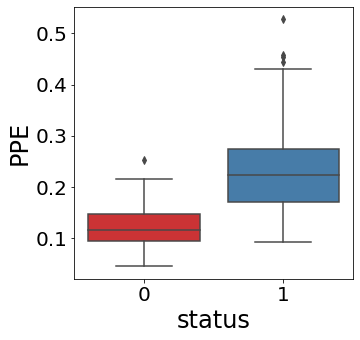

In [161]:

plt.figure(figsize=(5,5))

sns.boxplot(x='status', y='PPE', data=df_temp, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('status', fontsize = 24)
plt.ylabel('PPE', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)



# Basic bivariate Statistical Observations for PPE feature: 
## For people with no Parkinson's Disease(status=0):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.115119
### Spread is measured by the IQR = 0.104294
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution). This can be confirmed from the above box plot(in red).

## For people with Parkinson's Disease(status=1):
### Since there are outliers in this distribution, 
### Central value is measured by Median = 0.222716
### Spread is measured by the IQR = 0.104294
### This feature has a positive kurtosis(more number of outliers) and positive skew(right-skewed distribution).

## Correlation between this independant variable and target variable:

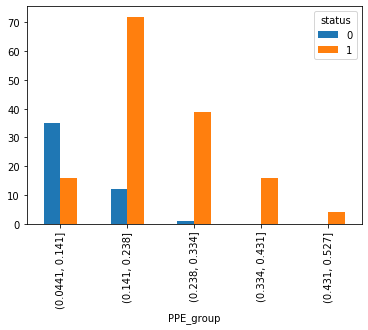

In [162]:

df_temp = df.copy(deep=True)
df_temp['PPE_group'] = pd.cut(x=df_temp['PPE'],bins=5)
pd.crosstab(df_temp['PPE_group'],df_temp['status']).plot(kind='bar')




## Observations on the correlation:
## By looking at the above plot, we can say that this is a good feature in the prediction of PD. When the  PPE is lower, the chances of this disease being positive are low and the chances increase when the PPE goes up. And when  PPE goes beyond a point, chance of this disease being positive comes down.
## So, we will keep this feature in our further analysis.

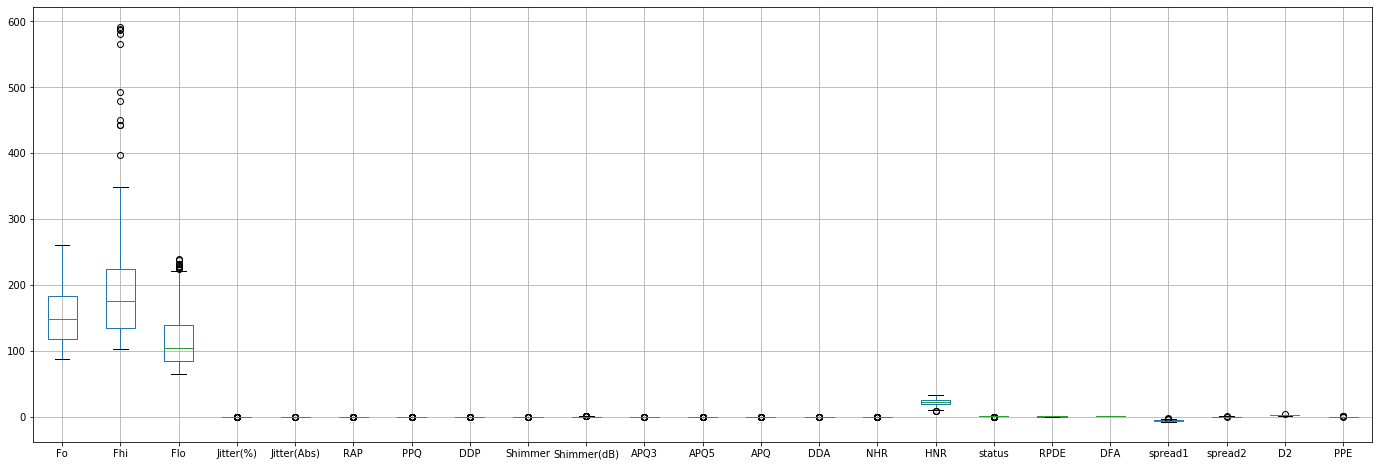

In [163]:
# now we will see a box plot for all the variables
df.boxplot(figsize=(24,8))

In [164]:
#Will try to find the correlation between independant variables with the target variable('status')
df.corr()

,Fo,Fhi,Flo,Jitter(%),Jitter(Abs),RAP,PPQ,DDP,Shimmer,Shimmer(dB),...,DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
Fo,1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
Fhi,0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
Flo,0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


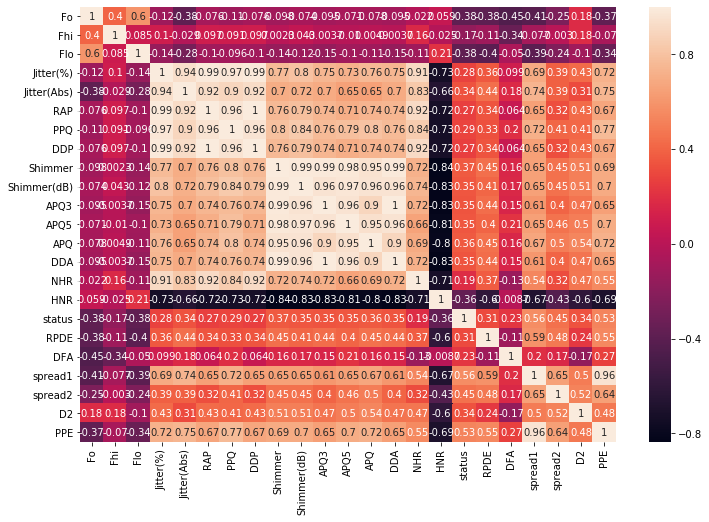

In [165]:
#plotting a heat map to find correlation between all columns
plt.figure(figsize=(12, 8))

corr = df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

## As we can see from the above heatmap,
### Fhi, NHR and DFA have relatively lower correlation values with target variable
### spread1 has the highest correlation with the target variable

## first we will build the model with all the independant variables. Then we will remove some/all of the variables which has lower correlation with target variable, and see if that is improving the model accuracy.

In [166]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

## As we can see from the above distribution the number of cases with parkinson's disease are far more in the given data set(almost 1:3 ratio). So, the model's ability to predict status 1 will be better than predicting status 0.

# Considering all the columns for model building. 

In [167]:
#dropping 'name' column before doing the split
df = df.drop('name',axis=1)
df.head()

,Fo,Fhi,Flo,Jitter(%),Jitter(Abs),RAP,PPQ,DDP,Shimmer,Shimmer(dB),...,DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [168]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X =  df.drop("status", axis=1)
y =  df["status"]

X.head()

,Fo,Fhi,Flo,Jitter(%),Jitter(Abs),RAP,PPQ,DDP,Shimmer,Shimmer(dB),...,APQ,DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [169]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

In [277]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
dt_model.fit(train_set, train_labels)

Y1_predict = dt_model.predict(test_set)

print("Printing Crosstab:")
print(pd.crosstab(Y1_predict, test_labels))

#printing the confusion matrix
Y_acc = metrics.accuracy_score(test_labels,Y1_predict)
print("Accuracy of the model is {0:2f}".format(Y_acc*100))
Y_cm=metrics.confusion_matrix(test_labels,Y1_predict)
print(Y_cm)

#classification report
Y_CR=metrics.classification_report(test_labels,Y1_predict)
print(Y_CR)


Printing Crosstab:
status   0   1
row_0         
0       12   1
1        7  39
Accuracy of the model is 86.440678
[[12  7]
 [ 1 39]]
              precision    recall  f1-score   support

           0       0.92      0.63      0.75        19
           1       0.85      0.97      0.91        40

    accuracy                           0.86        59
   macro avg       0.89      0.80      0.83        59
weighted avg       0.87      0.86      0.86        59



## As expected, the model is able to predict status = 1, more accurately than status = 0, since the bias towards people with PD = 1 is way higher in this data set.

In [180]:
#Sensitivity(True positives)
TPR=Y_cm[1,1]/(Y_cm[1,0]+Y_cm[1,1])
print("Sensitivity of the model is {0:2f}".format(TPR))

Sensitivity of the model is 0.975000


In [181]:
#Specificity(True negatives)
TNR=Y_cm[0,0]/(Y_cm[0,0]+Y_cm[0,1])
print("Specificity of the model is {0:2f}".format(TNR))

Specificity of the model is 0.631579


In [182]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['1', '2', '3']
Parkinson_Disease_File = open('parkinson_disease.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Parkinson_Disease_File, feature_names = list(train_set), class_names = list(train_char_label))

Parkinson_Disease_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))


                  Imp
Fo           0.219150
Fhi          0.099800
Flo          0.000000
Jitter(%)    0.000000
Jitter(Abs)  0.000000
RAP          0.000000
PPQ          0.000000
DDP          0.040734
Shimmer      0.000000
Shimmer(dB)  0.000000
APQ3         0.000000
APQ5         0.000000
APQ          0.000000
DDA          0.106000
NHR          0.000000
HNR          0.000000
RPDE         0.000000
DFA          0.067644
spread1      0.000000
spread2      0.000000
D2           0.079409
PPE          0.387263


In [183]:
# We will use AUC (Area Under Curve) as the evaluation metric. 
# Our target value is binary so it’s a binary classification problem. 
# AUC is a good way for evaluation for this type of problems.
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, Y1_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.8032894736842104

# Regularisation of decision tree model

## The first parameter to tune is max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. We fit a decision tree with depths ranging from 1 to 10 and plot the training and test auc scores.

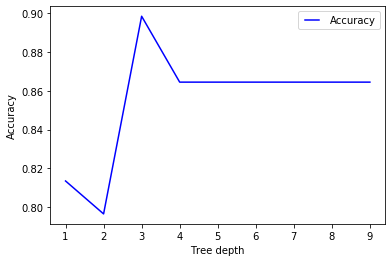

In [195]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 10))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 1, 
                                 max_depth = depth)
    clf.fit(train_set, train_labels)
    score = clf.score(test_set, test_labels)
    accuracy.append(score)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth_range,accuracy, color='b', label="Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

### Observation - As we can see from the above plot, the model's accuracy seems to be the best when depth is 3. The accuracy value is close to 90% which is more than the original accuracy. 

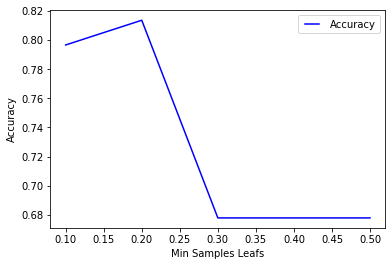

In [196]:
# List of values to try for min_samples_leaf:
min_samples_leafs  = np.linspace(0.1, 0.5, 5, endpoint=True)
# List to store the average RMSE for each value of max_depth:
accuracy = []
for leafs in min_samples_leafs:
    
    clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 1, 
                                 min_samples_leaf=leafs)
    clf.fit(train_set, train_labels)
    score = clf.score(test_set, test_labels)
    accuracy.append(score)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs,accuracy, color='b', label="Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Min Samples Leafs')
plt.show()

### Observation - As we can see from the above plot, the model's accuracy seems to be the best when min_samples_leaf is 0.2. The accuracy value is close to 81.2% which is less than the original accuracy. So, we might not have to consider this in our regularization.

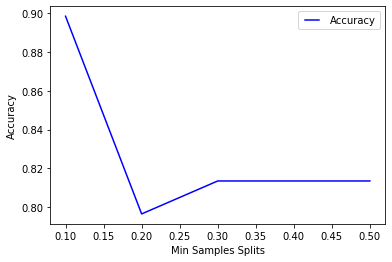

In [204]:
# List of values to try for min_samples_split:
min_samples_splits = np.linspace(0.1, 0.5, 5, endpoint=True)
# List to store the average RMSE for each value of min_samples_split:
accuracy = []
for splits in min_samples_splits:
    
    clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 1, 
                                 min_samples_split=splits)
    clf.fit(train_set, train_labels)
    score = clf.score(test_set, test_labels)
    accuracy.append(score)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits,accuracy, color='b', label="Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Min Samples Splits')
plt.show()

### Observation - We can clearly see that when we consider 100% of the samples at each node, the model cannot learn enough about the data. So the max value of this parameter at which this model predicts better is the default value. So, we will not consider this in our regularization. 

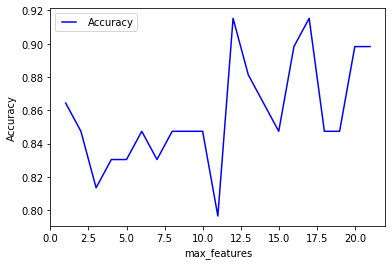

In [206]:
# List of values to try for max_features:
max_features = list(range(1,X.shape[1]))
# List to store the average RMSE for each value of max_features:
accuracy = []
for features in max_features:
    
    clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 1, 
                                 max_features=features)
    clf.fit(train_set, train_labels)
    score = clf.score(test_set, test_labels)
    accuracy.append(score)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features,accuracy, color='b', label="Accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('max_features')
plt.show()

### Observation - As we can see from the above plot, the model's accuracy seems to be the best when max_features is around 12. The accuracy is close to 92% which is more than the original accuracy.

# Now build a model with max_depth = 3 and min_samples_leaf = 0.2 and see if there is any change in the model accuracy

In [215]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_features=12, random_state=1)
dt_model.fit(train_set, train_labels)

Y1_predict = dt_model.predict(test_set)

#pd.crosstab(Y1_predict, test_labels).plot(kind='bar')

#printing the confusion matrix
Y_acc = metrics.accuracy_score(test_labels,Y1_predict)
print("Accuracy of the model is {0:2f}".format(Y_acc*100))
Y_cm=metrics.confusion_matrix(test_labels,Y1_predict)
print(Y_cm)

#classification report
Y_CR=metrics.classification_report(test_labels,Y1_predict)
print(Y_CR)

# We will use AUC (Area Under Curve) as the evaluation metric. 
# Our target value is binary so it’s a binary classification problem. 
# AUC is a good way for evaluation for this type of problems.
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, Y1_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

Accuracy of the model is 91.525424
[[14  5]
 [ 0 40]]
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       0.89      1.00      0.94        40

    accuracy                           0.92        59
   macro avg       0.94      0.87      0.89        59
weighted avg       0.92      0.92      0.91        59

0.868421052631579


### Observation - 
### 1. The original accuracy is 86.4%.
### 2.  When we add max_depth=3,  max_features=12, the accuracy becomes 88.1%, which is better.
### 3.  When we add max_depth=3 alone, the accuracy becomes 89.83%, which is the best among these three.
### 4. when we add max_features=12 alone, the accuracy becomes 91.52%, which is the highest among all the other parameters.

### Conclusions - Using regularization parameters, 
### 1. We are clearly seeing an improvement in the accuracy of the model . 
### 2. We can also see that there is very good improvement in the precision, recall and f1-scores as well. 
### 3. We can also see that there is a very good improvement in the ROC-AUC as well. 

### Overall, using regularization parameters the model performance can be tuned to be better. 

# Implement the decision tree using Random Forest

In [265]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=25, random_state=1)
rfcl = rfcl.fit(train_set, train_labels)

In [266]:
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.847457627118644

# Find the optimal n_esimators and max_features values using GridSearchCV

In [251]:
param = {'n_estimators': [10,50,100,200,500], 
         'max_features': [2,3,4,5,6,7,8,9,10,11,12,13]}

In [252]:
from sklearn.model_selection import GridSearchCV

In [267]:
gs = GridSearchCV(RandomForestClassifier(random_state=1), param_grid=param,cv=5,scoring='accuracy')

In [268]:
gs.fit(train_set,train_labels)

C:\Users\nm949133\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [274]:
gs.best_params_

{'max_features': 2, 'n_estimators': 100}

## Observation - According to GridSearchCV, max_features=2 and n_estimators=100 is the combination at which the accuracy is maximum with this data set for RandomForest. We have taken only 2 best parameters in this gridsearch as taking more number of parameters would take very long time to complete the search. 

In [273]:
rfcl_lat = RandomForestClassifier(n_estimators=100, random_state=1, max_features=2)
rfcl_lat = rfcl_lat.fit(train_set, train_labels)
test_pred = rfcl_lat.predict(test_set)
rfcl_lat.score(test_set , test_labels)

0.864406779661017

## Observation - With the best values of some parameters from GridSearchCV, the accuracy of this model has gone up by 2%.  So the optimal value of number of trees is 100, which gives the best accuracy. 